# 머신러닝 프로젝트 - 게임봇 탐지 시스템

## 1. 연구 배경

- 온라인 게임 이용자가 증가하고 시장 규모가 커지면서 여러 가지 부정행위 발생.
- 게임 아이템, 사이버 머니와 같은 사이버 자산은 실제 통화로 수익을 창출할 수 있어 대부분의 불법 활동이 지속적으로 발생.
- 게임 봇은 플레이 시간을 확보하고, 계정 레벨업과 각종 재화 획득을 용이하게 해주는 대표적인 불법 프로그램. 사용자와 게임 회사에 직간접적 피해.
- 특히 대규모 게임 봇을 전문적으로 운영하는 작업장은 게임 서비스 존폐에 영향 주는 중대한 보안 위협.
- 성능 좋은 게임봇 탐지 시스템의 필요성 대두.

## 2. 선행 연구

- 행위 시간 간격 기반 게임 봇 탐지 기법  (2018.10 / 강용구, 김휘강)
- 캐릭터 이름을 이용한 MMORPG 봇 탐지 기법(2017.08 / 강성욱, 이은조)
- Crime Scene Reconstruction: Online Gold Farming Network Analysis(2017.03 / Hyukmin Kwon, Aziz Mohaisen)
- Multimodal game bot detection using user behavioral characteristics(2016 / Ah Reum Kang, Seong Hoon Jeong, Aziz Mohaisen and Huy Kang Kim)
- 자기 유사도를 이용한 MMORPG 게임봇 탐지 시스템(2016.02 / 이은조, 조원준)
- MMORPG에서 게임 봇 프로그램 탐지를 위한 플레이어 패턴 변화 모델에 관한 연구(2011.02 / 윤태복, 이지형)
- Access Record를 활용한 게임 봇과 유저 이탈의 상관관계 분석(2018.10 / 김영환, 양성일, 김휘강)
- You Are a Game Bot!: Uncovering Game Bots in MMORPGs via Self-similarity in the Wild(Eunjo Lee, Jiyoung Woo)
- On sampling algorithms for imbalanced binary data: performance comparison and some caveats(2017.09 / HanYong Kim, Woojoo Lee)

#### summary
- 플레이어 패턴 기반 봇 탐지
    - 몬스터 사냥 시간, 마을 체류 시간, 휴식 상태, 이동 거리 등
- 행위 시간 간격 기반 봇 탐지
- 자기 유사도를 이용한 봇 탐지
- 캐릭터 이름을 이용한 봇 탐지

#### 한계점
- 원본 데이터는 유저 데이터보다 봇 데이터가 훨씬 적어 정확도가 높아질 수밖에 없는 한계.
    - 기존 연구는 머신러닝으로 분류한 뒤 precision, recall로 검증하는 방식으로 이를 보완.
- 짧은 시간 동작하는 경우에도 탐지 어려움, 게임 봇에 대한 정답지가 없는 경우에도 그대로 적용할 수 없음.
- 다양한 게임에 두루 적용, 적은 유지 보수 비용 만으로 지속 사용할 수 있는 모델(EWMA 기반의 탐지 모델 자동 학습 알고리즘 보완) 필요.
- 파밍 봇 외뱅커 봇 등 다양한 목적으로 등장하는 게임 봇 탐지 기법 부족.

## 3. 문제 정의

- 1) 인간 유저와 게임 봇 패턴 분석 기반 분류 시스템.
- 2) 모델 신뢰성 문제 해결을 위해 유저 데이터와 봇 데이터 간 data imbalance 해결.
    - 유저와 봇 데이터 크기 비율은 약 9:1
    - 샘플링 방법(under sampling, over sampling, 복합 샘플링)
    - 정상 유저 데이터를 활용해 비지도 및 딥러닝 방식인 Auto Encoder로 봇 탐지 모델(anomaly detector)을 만들어 정확도 상승과 기존 연구의 한계 보완.
- 3) 정밀도 100% 유지하면서 재현율을 최대한 올리기 위해 정확도 상승 방법론적 공헌에 초점.
    - one class SVM 등 다양한 모델 활용해 정확도 상승 기여.
    - 이번 연구에서 FP(type 1 error)는 실제로 봇이 아닌데 봇으로 예측한 확률, FN(type 2 error)은 실제로 봇인데 봇이 아니라고 예측한 수
    - 봇 탐지 시스템에서 FP는 FN보다 더 중요하지만, FN은 봇 탐지 시스템의 핵심.
    - FP = 0을 유지하면서 FN을 최대한 0에 가깝게, 즉 정밀도와 재현율을 올리려면 기본적으로 정확도를 높여야.
        - 정밀도, 재현율 수식에서 밑변에 있는 FP(type 1 error)와 FN(type 2 error)이 서로 상충관계에 있기 때문에 정밀도와 재현율 역시 서로 상충관계.
    - 선행 연구(Multimodal game bot detection using user behavioral characteristics)에서 랜덤포레스트 모델의 경우 정확도(accuracy)는 96.1%. 정밀도(precision)도 95.6%, 재현율(recall) 74.2%.
- 4) 정확도를 높이기 위한 최적의 변수 선택 방법 제안

## 문제 해결 플로우차트
- EDA(지니불순도) -> 랜덤포레스트(RF) 모델 선정 -> 샘플링 방법(under sampling, over sampling, 복합 샘플링) 선택 -> 변수 선택 방법(5가지 중 하나) 선택(RF 정확도 그래프 확인) -> RF 하이퍼 파라미터 조정 / 유저 데이터 샘플링 -> 오토 인코더 구현  

## 4. 데이터 수집

- 고려대 Hacking and Countermeasure Research Lab
    - http://ocslab.hksecurity.net/Datasets/game-bot-detection
- CSV 포맷의 게임유저 액션로그 데이터(총 10개 파일, 약 500MB)
    - NCSOFT에서 운영 중인 MMORPG AION의 약 3개월간(2010.04.09 ~ 2010.07.05) 유저 액션 로그.
    - IP 주소, 캐릭터 ID, 계정 ID는 임의의 값으로 일대일 치환.
    - 해당 게임로그에서 3시간 이상 활동한 캐릭터를 보유한 계정(즉, 충분한 활동을 관찰할 수 있는 계정)에 대해 게임봇 여부를 구분할 수 있는 목록 제공.

## 5. 데이터 처리

### 5.1 CSV 파일 로드

In [5]:
be_player_info = pd.read_csv("(before) Player information features.csv")
be_player_info.tail(3)

,Act_time,Actor,A_Acc,loc_x,loc_y,loc_z,etc_str1,etc_num2
5687616,2010-07-05 23:59:59.190,364623,10188071,1684,1534,119,220.126.,10
5687617,2010-07-05 23:59:59.833,442931,6883773,1399,1406,572,118.128.,35
5687618,2010-07-05 23:59:59.833,454254,6971408,1246,1563,214,210.216.,40


In [32]:
grouped = be_player_info.groupby(be_player_info["Actor"])
grouped.size()

Actor
1047      100
1049       32
1061        1
1106        1
1120        8
         ... 
473019      1
473020      1
473021      2
473022      1
473023      1
Length: 97354, dtype: int64

In [41]:
be_player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5687619 entries, 0 to 5687618
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Act_time  object
 1   Actor     int64 
 2   A_Acc     int64 
 3   loc_x     int64 
 4   loc_y     int64 
 5   loc_z     int64 
 6   etc_str1  object
 7   etc_num2  int64 
dtypes: int64(6), object(2)
memory usage: 347.1+ MB


In [18]:
af_player_info = pd.read_csv("(after) Player information features.csv")
af_player_info.tail(3)

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,Type
49736,472887,6764910,1,1,15200,15200.0,619.1027,4,1,11,Human
49737,472897,7083623,1,1,12157,12157.0,41728.9706,4,1,10,Human
49738,472898,6558612,1,1,12961,12961.0,4.0054,1,1,6,Human


In [43]:
grouped = af_player_info.groupby(af_player_info["A_Acc"])
grouped.size()

A_Acc
0           20
15272        4
23281        4
28597        3
100853       1
            ..
11368199     1
11369143     1
11369299     1
11369375     1
11369388     1
Length: 27181, dtype: int64

In [25]:
grouped = af_player_info.groupby(af_player_info["A_Acc"])
# grouped = af_player_info["Max_level"].groupby(af_player_info["A_Acc"])
grouped.size()
# list(pd.DataFrame(grouped).iloc[0])

A_Acc
0           20
15272        4
23281        4
28597        3
100853       1
            ..
11368199     1
11369143     1
11369299     1
11369375     1
11369388     1
Length: 27181, dtype: int64

In [21]:
af_player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Actor             49739 non-null  int64  
 1   A_Acc             49739 non-null  int64  
 2   Login_day_count   49739 non-null  int64  
 3   Logout_day_count  49739 non-null  int64  
 4   Playtime          49739 non-null  int64  
 5   playtime_per_day  49739 non-null  float64
 6   avg_money         49739 non-null  float64
 7   Login_count       49739 non-null  int64  
 8   ip_count          49739 non-null  int64  
 9   Max_level         49739 non-null  int64  
 10  Type              49739 non-null  object 
dtypes: float64(2), int64(8), object(1)
memory usage: 4.2+ MB


In [27]:
be_player_action = pd.read_csv("(before) Player actions features.csv")
be_player_action.tail(3)

,Actor,A_Acc,Log_ID,count
4885549,473023,4628157,504,4
4885550,473023,4628157,719,1
4885551,473024,6938680,110,1


In [36]:
grouped = be_player_action.groupby(be_player_action["Actor"])
grouped.size()

Actor
1047      108
1049       93
1061       11
1106       19
1120       71
         ... 
473020     23
473021     27
473022     20
473023     16
473024      1
Length: 105215, dtype: int64

In [39]:
be_player_action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4885552 entries, 0 to 4885551
Data columns (total 4 columns):
 #   Column  Dtype
---  ------  -----
 0   Actor   int64
 1   A_Acc   int64
 2   Log_ID  int64
 3   count   int64
dtypes: int64(4)
memory usage: 149.1 MB


In [40]:
af_player_action = pd.read_csv("(after) Player actions features.csv")
pd.options.display.max_columns = len(af_player_action.columns)
af_player_action.tail(3)

,Actor,A_Acc,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Abyss_get_ratio,Abyss_get_count,abyss_get_count_per_day,Exp_repair_count,Exp_repair_count_per_day,Use_portal_count,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day,Type
49736,472887,6764910,0,0.2565,10,10.0,13.1606,513,513.0,15.6747,611,611.0,2.7450,107,107.0,0.0,0,0.0,4,4.0,0,0.0,0,0.0,4,4.0,11,11.0,0,0.0,Human
49737,472897,7083623,19,0.0000,0,0.0,16.1488,343,343.0,17.8908,380,380.0,6.4030,136,136.0,0.0,0,0.0,1,1.0,0,0.0,0,0.0,1,1.0,10,10.0,0,0.0,Human
49738,472898,6558612,10,0.8487,6,6.0,18.1047,128,128.0,16.8317,119,119.0,7.9208,56,56.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1.0,8,8.0,0,0.0,Human


In [42]:
grouped = af_player_action.groupby(af_player_action["A_Acc"])
grouped.size()

A_Acc
0           20
15272        4
23281        4
28597        3
100853       1
            ..
11368199     1
11369143     1
11369299     1
11369375     1
11369388     1
Length: 27181, dtype: int64

In [23]:
af_player_action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Actor                       49739 non-null  int64  
 1   A_Acc                       49739 non-null  int64  
 2   collect_max_count           49739 non-null  int64  
 3   Sit_ratio                   49739 non-null  float64
 4   Sit_count                   49739 non-null  int64  
 5   sit_count_per_day           49739 non-null  float64
 6   Exp_get_ratio               49739 non-null  float64
 7   Exp_get_count               49739 non-null  int64  
 8   exp_get_count_per_day       49739 non-null  float64
 9   Item_get_ratio              49739 non-null  float64
 10  Item_get_count              49739 non-null  int64  
 11  item_get_count_per_day      49739 non-null  float64
 12  Money_get_ratio             49739 non-null  float64
 13  Money_get_count             497

In [11]:
be_group_act = pd.read_csv("(before) Group activities features.csv")
be_group_act.tail(3)

,Act_time,Log_ID,Actor,A_Acc
84472,2010-07-05 23:59:09.410,609,130358,6176755
84473,2010-07-05 23:59:14.270,609,145965,6351474
84474,2010-07-05 23:59:50.473,609,395408,10707768


In [37]:
be_group_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84475 entries, 0 to 84474
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Act_time  84475 non-null  object
 1   Log_ID    84475 non-null  int64 
 2   Actor     84475 non-null  int64 
 3   A_Acc     84475 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.6+ MB


In [49]:
af_group_act = pd.read_csv("(after) Group activities features.csv")
af_group_act.tail(3)

,Actor,A_Acc,Avg_PartyTime,GuildAct_count,GuildJoin_count,Type
49736,472887,6764910,0.0,0,0,Human
49737,472897,7083623,0.0,0,0,Human
49738,472898,6558612,0.0,0,0,Human


In [35]:
af_group_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Actor            49739 non-null  int64  
 1   A_Acc            49739 non-null  int64  
 2   Avg_PartyTime    49739 non-null  float64
 3   GuildAct_count   49739 non-null  int64  
 4   GuildJoin_count  49739 non-null  int64  
 5   Type             49739 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [26]:
be_social_int = pd.read_csv("(before) Social interaction diversity features.csv")
be_social_int.tail(3)

,Actor,A_Acc,GuildAct_count,GuildJoin_count,a126_5_Degree,a134_5_Degree,a219_5_Degree,a229_5_Degree,a247_5_Degree,acha_5_Degree,Type
49736,472887,6764910,0,0,0,0,0,1,0,0,Human
49737,472897,7083623,0,0,0,0,0,1,0,0,Human
49738,472898,6558612,0,0,0,0,0,0,0,0,Human


In [34]:
be_social_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Actor            49739 non-null  int64 
 1   A_Acc            49739 non-null  int64 
 2   GuildAct_count   49739 non-null  int64 
 3   GuildJoin_count  49739 non-null  int64 
 4   a126_5_Degree    49739 non-null  int64 
 5   a134_5_Degree    49739 non-null  int64 
 6   a219_5_Degree    49739 non-null  int64 
 7   a229_5_Degree    49739 non-null  int64 
 8   a247_5_Degree    49739 non-null  int64 
 9   acha_5_Degree    49739 non-null  int64 
 10  Type             49739 non-null  object
dtypes: int64(10), object(1)
memory usage: 4.2+ MB


In [50]:
af_social_int = pd.read_csv("(after) Social interaction diversity features.csv")
af_social_int.tail(3)
# The social interaction diversity feature indicates the entropy of party play,
# friendship, trade, whisper, mail, shop, and guild actions.

,Actor,A_Acc,Social_diversity,Type
49736,472887,6764910,0.0,Human
49737,472897,7083623,0.0,Human
49738,472898,6558612,0.0,Human


In [47]:
af_social_int.describe()

,Actor,A_Acc,Social_diversity
count,49739.000000,4.973900e+04,49739.000000
mean,344940.877058,8.483737e+06,0.728766
std,127634.620397,1.963675e+06,0.454765
min,1047.000000,0.000000e+00,0.000000
25%,272154.000000,6.878566e+06,0.410100
50%,400583.000000,8.290550e+06,0.814800
75%,442200.500000,1.043333e+07,1.082200
max,472898.000000,1.136939e+07,1.809500


In [28]:
be_network_mea = pd.read_csv("(before) Network measures features.csv")
pd.options.display.max_columns = len(be_network_mea)
be_network_mea.tail(3)

,Actor,A_Acc,a126_5_In_degree,a126_5_Out_degree,a126_5_Degree,a126_5_Weighted_degree,a126_5_Weighted_indegree,a126_5_Weighted_outdegree,a126_5_Eccentricity,a126_5_Closeness_centrality,a126_5_Between_centrality,a126_5_Authority,a126_5_Hub,a126_5_Modularity_class,a126_5_Pagerank,a126_5_Component_ID,a126_5_str_conn_ID,a126_5_CC,a126_5_Eigenvector,a134_5_In_degree,a134_5_Out_degree,a134_5_Degree,a134_5_Weighted_degree,a134_5_Weighted_indegree,a134_5_Weighted_outdegree,a134_5_Eccentricity,a134_5_Closeness_centrality,a134_5_Between_centrality,a134_5_Authority,a134_5_Hub,a134_5_Modularity_class,a134_5_Pagerank,a134_5_Component_ID,a134_5_str_conn_ID,a134_5_CC,a134_5_Eigenvector,a219_5_In_degree,a219_5_Out_degree,a219_5_Degree,a219_5_Weighted_degree,a219_5_Weighted_indegree,a219_5_Weighted_outdegree,a219_5_Eccentricity,a219_5_Closeness_centrality,a219_5_Between_centrality,a219_5_Authority,a219_5_Hub,a219_5_Modularity_class,a219_5_Pagerank,a219_5_Component_ID,a219_5_str_conn_ID,a219_5_CC,a219_5_Eigenvector,a229_5_In_degree,a229_5_Out_degree,a229_5_Degree,a229_5_Weighted_degree,a229_5_Weighted_indegree,a229_5_Weighted_outdegree,a229_5_Eccentricity,a229_5_Closeness_centrality,a229_5_Between_centrality,a229_5_Authority,a229_5_Hub,a229_5_Modularity_class,a229_5_Pagerank,a229_5_Component_ID,a229_5_str_conn_ID,a229_5_CC,a229_5_Eigenvector,a247_5_In_degree,a247_5_Out_degree,a247_5_Degree,a247_5_Weighted_degree,a247_5_Weighted_indegree,a247_5_Weighted_outdegree,a247_5_Eccentricity,a247_5_Closeness_centrality,a247_5_Between_centrality,a247_5_Authority,a247_5_Hub,a247_5_Modularity_class,a247_5_Pagerank,a247_5_Component_ID,a247_5_str_conn_ID,a247_5_CC,a247_5_Eigenvector,acha_5_In_degree,acha_5_Out_degree,acha_5_Degree,acha_5_Weighted_degree,acha_5_Weighted_indegree,acha_5_Weighted_outdegree,acha_5_Eccentricity,acha_5_Closeness_centrality,acha_5_Between_centrality,acha_5_Authority,acha_5_Hub,acha_5_Modularity_class,acha_5_Pagerank,acha_5_Component_ID,acha_5_str_conn_ID,acha_5_CC,acha_5_Eigenvector,Type
49736,472887,6764910,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,1,0,1,3,3,0,0,0.0,0.0,0.000008,0.0,67,0.000015,1,13894,0.0,0.002991,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,Human
49737,472897,7083623,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,1,0,1,2,2,0,0,0.0,0.0,0.000008,0.0,685,0.000011,422,32688,0.0,0.000824,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,Human
49738,472898,6558612,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.0,0,0.000000,0,0,0.0,0.000000,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,Human


In [32]:
be_network_mea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Columns: 105 entries, Actor to Type
dtypes: float64(42), int64(62), object(1)
memory usage: 39.8+ MB


In [51]:
af_network_mea = pd.read_csv("(after) Network measures features.csv")
pd.options.display.max_columns = len(af_network_mea)
af_network_mea.tail(3)

,Actor,A_Acc,p_in_deg,p_out_deg,p_Win_deg,p_Wout_deg,p_cc,f_in_deg,f_out_deg,f_Win_deg,f_Wout_deg,f_cc,t_in_deg,t_out_deg,t_Win_deg,t_Wout_deg,t_cc,m_in_deg,m_out_deg,m_Win_deg,m_Wout_deg,m_cc,s_in_deg,s_out_deg,s_Win_deg,s_Wout_deg,s_cc,w_in_deg,w_out_deg,w_Win_deg,w_Wout_deg,w_cc,p_deg,p_Wdeg,p_between2,p_closeness2,p_Eigenvector2,p_Eccentricity2,p_Authority2,p_Hub2,p_Pagerank2,f_deg,f_Wdeg,f_between2,f_closeness2,f_Eigenvector2,f_Eccentricity2,f_Authority2,f_Hub2,f_Pagerank2,t_deg,t_Wdeg,t_between2,t_closeness2,t_Eigenvector2,t_Eccentricity2,t_Authority2,t_Hub2,t_Pagerank2,c_deg,c_Wdeg,c_between2,c_closeness2,c_Eigenvector2,c_Eccentricity2,c_Authority2,c_Hub2,c_Pagerank2,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2,Type
49736,472887,6764910,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,1,0,3,0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,Human
49737,472897,7083623,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,1,0,2,0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,Human
49738,472898,6558612,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Human


In [5]:
af_network_mea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Actor            49739 non-null  int64  
 1   A_Acc            49739 non-null  int64  
 2   p_in_deg         49739 non-null  int64  
 3   p_out_deg        49739 non-null  int64  
 4   p_Win_deg        49739 non-null  int64  
 5   p_Wout_deg       49739 non-null  int64  
 6   p_cc             49739 non-null  float64
 7   f_in_deg         49739 non-null  int64  
 8   f_out_deg        49739 non-null  int64  
 9   f_Win_deg        49739 non-null  int64  
 10  f_Wout_deg       49739 non-null  int64  
 11  f_cc             49739 non-null  float64
 12  t_in_deg         49739 non-null  int64  
 13  t_out_deg        49739 non-null  int64  
 14  t_Win_deg        49739 non-null  int64  
 15  t_Wout_deg       49739 non-null  int64  
 16  t_cc             49739 non-null  float64
 17  m_in_deg    

In [49]:
af_network_mea.describe()

,Actor,A_Acc,p_in_deg,p_out_deg,p_Win_deg,p_Wout_deg,p_cc,f_in_deg,f_out_deg,f_Win_deg,f_Wout_deg,f_cc,t_in_deg,t_out_deg,t_Win_deg,t_Wout_deg,t_cc,m_in_deg,m_out_deg,m_Win_deg,m_Wout_deg,m_cc,s_in_deg,s_out_deg,s_Win_deg,s_Wout_deg,s_cc,w_in_deg,w_out_deg,w_Win_deg,w_Wout_deg,w_cc,p_deg,p_Wdeg,p_between2,p_closeness2,p_Eigenvector2,p_Eccentricity2,p_Authority2,p_Hub2,p_Pagerank2,f_deg,f_Wdeg,f_between2,f_closeness2,f_Eigenvector2,f_Eccentricity2,f_Authority2,f_Hub2,f_Pagerank2,t_deg,t_Wdeg,t_between2,t_closeness2,t_Eigenvector2,t_Eccentricity2,t_Authority2,t_Hub2,t_Pagerank2,c_deg,c_Wdeg,c_between2,c_closeness2,c_Eigenvector2,c_Eccentricity2,c_Authority2,c_Hub2,c_Pagerank2,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2
count,49739.000000,4.973900e+04,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000,49739.000000
mean,344940.877058,8.483737e+06,21.630612,21.574680,42.492008,42.392368,0.061019,4.409417,4.407547,4.555862,4.553992,0.050846,4.600092,4.588070,12.880878,12.870866,0.097434,3.665635,3.819618,13.538370,14.214138,0.144082,0.423732,0.422385,0.928828,0.928386,0.005132,6.522045,6.511993,52.640142,52.586059,0.022009,43.205292,84.884376,0.283419,1.053741,0.241199,1.507147,0.066688,0.066809,0.041497,8.816965,9.109853,0.167434,0.778403,0.212389,1.143167,0.044070,0.043909,0.029816,9.188162,25.751744,0.172601,1.010816,0.238706,1.460222,0.031364,0.032650,0.022136,13.034038,105.226201,0.166288,0.695953,0.234001,0.527192,0.078068,0.080741,0.065341,7.485253,27.752508,0.054002,0.957458,0.330646,0.954543,0.003378,0.012807,0.012184
std,127634.620397,1.963675e+06,51.178653,37.245486,115.532889,76.969208,0.131760,8.899762,8.916954,9.352095,9.437599,0.163762,8.246465,8.179617,35.414998,37.141396,0.220065,3.899168,132.222880,55.735041,142.096812,0.186404,8.839213,1.423107,31.926415,10.418161,0.044149,17.240725,19.110717,194.528602,202.610299,0.081991,80.808219,173.537435,0.508199,0.737371,0.489779,0.861868,0.300782,0.302023,0.224211,17.797170,18.749999,0.393297,0.765600,0.422304,0.989708,0.232186,0.231783,0.186650,15.520755,69.135937,0.395530,0.741949,0.477253,0.887813,0.193540,0.199268,0.163440,35.044927,394.202192,0.464503,0.952667,0.489987,0.779554,0.327290,0.335297,0.291269,132.375511,159.121368,0.228413,0.917152,0.539937,0.915421,0.058365,0.115092,0.116462
min,1047.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272154.000000,6.878566e+06,0.000000,1.

#### 데이터 속성
- Player Information : 플레이어 정보(로그인, 게임 시간, 돈, 레벨 등)
- Player Action : 플레이어 행동(앉기, 경험치&돈 획득, 포탈 사용, Kill, 퀘스트 등)
- Group Activity : 플레이어 그룹 활동(파티, 길드)
- Network Activity : 플레이어 네트워킹(친구, 거래, 우편 등)

#### 컬럼
- Player Information
    - login_count : 로그인 횟수
    - logout_count : 로그아웃 횟수
    - login_day_count : 당일 로그인 여부
    - play_time : 플레이 시간
    - avg_money : 평균 돈 소지량
    - ip_count : ip 개수
    - max_level : 최고 레벨
- Player Action 
    - sit_count : 앉은 횟수
    - exp_get_amount : 경험치 획득량
    - item_get_count : 아이템 획득량
    - exp_repair_count : 경험치 복구량
    - money_get_count : 돈 획득량
    - abyss : 입장 횟수
    - use_portal_count : 포탈 사용 횟수
    - killed_by PC/NPC : PC/NPC에게 죽은 횟수
    - teleport_count : 텔레포트 사용 횟수
    - reborn_count : 부활 횟수
    - question_count : 퀘스트 관련 횟수
- Group Activity
    - total_party_time : 총 파티 시간
    - guild_join_count : 길드 활동 횟수
    - average_party_time : 평균 파티 시간
- Network Activity
    - trade_go : 거래 신청 보낸 횟수
    - trade_come : 거래 신청 수락 횟수
    - buy_from_shop : 상점에서 구입한 횟수
    - sell_to_shop : 상점에 판매한 횟수
    - buy_from_personal_shop : 개인상점에서 구입한 횟수
    - mail_go : 우편을 보낸 횟수
    - mail_come : 우편을 받은 횟수
    - invite : 파티 초대 신청을 보낸 횟수
    - join : 파티 초대를 수락한 횟수
    - revival : 부활 횟수
    - fight : 결투 횟수
    - friend_num : 친구 수
    - friend_num_change_count : 친구 수 변화량
    - too_much_gain : 시간당 획득량이 과도한 경우
    - too_much_AP : 같은 유저에게 AP를 과도하게 받은 경우

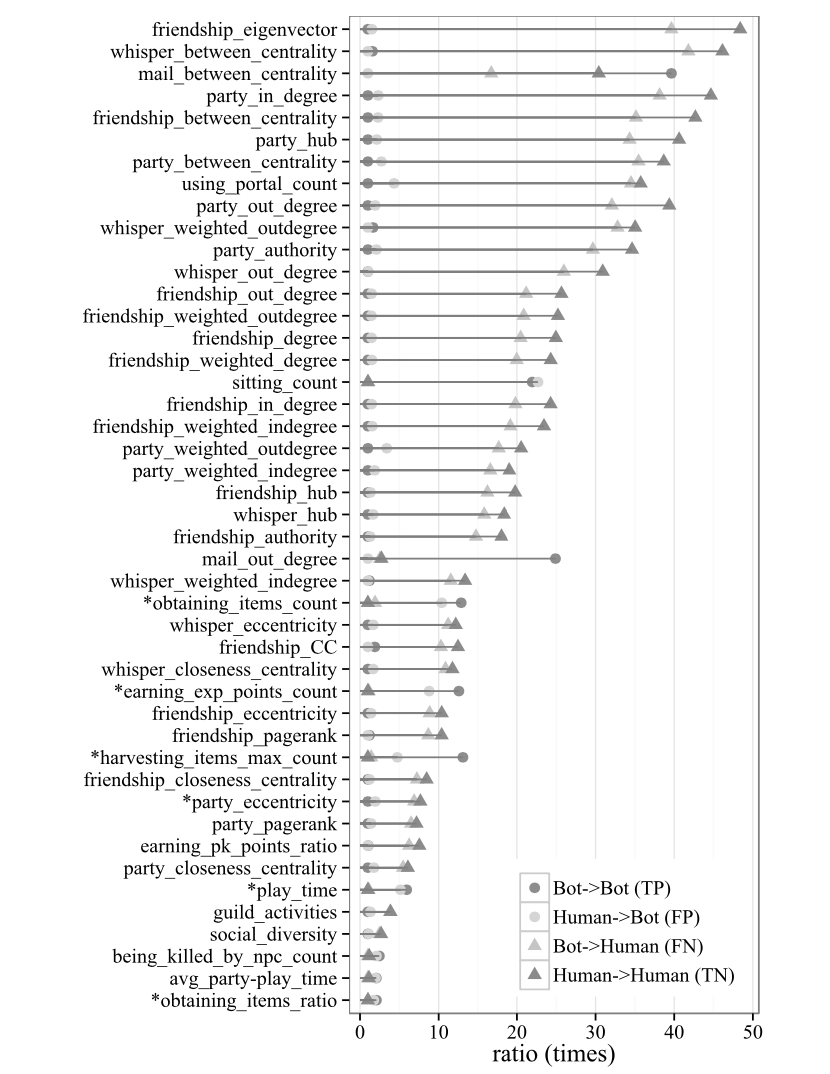

In [43]:
from PIL import Image

img = Image.open("features.png").convert('L')
img

### 5.2 static한 데이터셋 합치기

In [61]:
temp1 = pd.merge(af_player_info, af_player_action, on=["Actor", "A_Acc", "Type"])
temp2 = pd.merge(temp1, af_group_act, on=["Actor", "A_Acc", "Type"])
temp3 = pd.merge(temp2, af_social_int, on=["Actor", "A_Acc", "Type"])
df1 = pd.merge(temp3, af_network_mea, on=["Actor", "A_Acc", "Type"])
df1

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,Type,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Abyss_get_ratio,Abyss_get_count,abyss_get_count_per_day,Exp_repair_count,Exp_repair_count_per_day,Use_portal_count,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day,Avg_PartyTime,GuildAct_count,GuildJoin_count,Social_diversity,p_in_deg,p_out_deg,p_Win_deg,p_Wout_deg,p_cc,f_in_deg,f_out_deg,f_Win_deg,f_Wout_deg,f_cc,t_in_deg,t_out_deg,t_Win_deg,t_Wout_deg,t_cc,m_in_deg,m_out_deg,m_Win_deg,m_Wout_deg,m_cc,s_in_deg,s_out_deg,s_Win_deg,s_Wout_deg,s_cc,w_in_deg,w_out_deg,w_Win_deg,w_Wout_deg,w_cc,p_deg,p_Wdeg,p_between2,p_closeness2,p_Eigenvector2,p_Eccentricity2,p_Authority2,p_Hub2,p_Pagerank2,f_deg,f_Wdeg,f_between2,f_closeness2,f_Eigenvector2,f_Eccentricity2,f_Authority2,f_Hub2,f_Pagerank2,t_deg,t_Wdeg,t_between2,t_closeness2,t_Eigenvector2,t_Eccentricity2,t_Authority2,t_Hub2,t_Pagerank2,c_deg,c_Wdeg,c_between2,c_closeness2,c_Eigenvector2,c_Eccentricity2,c_Authority2,c_Hub2,c_Pagerank2,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,Human,6,1.0430,1012,24.0952,15.5210,15060,358.5714,6.2847,6098,145.1905,10.2010,9898,235.666667,11.0636,10735,255.5952,66,1.5714,2,0.0476,690,16.4286,172,4.0952,1051,25.0238,2,0.0476,6760.2061,1,0,0.6407,52,59,75,129,0.061119,12,11,12,11,0.022727,16,6,16,6,0.021429,3,3,3,3,0.000000,0,1,0,1,0.0,26,22,629,566,0.045977,111,204,0,1,1,2,0,0,0,23,23,0,1,1,2,0,0,0,22,22,0,1,1,2,0,0,0,48,1195,0,2,1,1,0,0,0,6,6,0,2,0,2,0,0,0
1,1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,Human,0,3.5570,141,8.8125,13.6226,540,33.7500,6.9122,274,17.1250,7.5429,299,18.687500,2.8507,113,7.0625,3,0.1875,2,0.1250,30,1.8750,16,1.0000,118,7.3750,0,0.0000,4792.6923,2,0,1.3499,9,8,9,10,0.095833,1,1,1,1,0.000000,6,3,7,11,0.261905,2,3,3,6,0.166667,0,0,0,0,0.0,0,0,0,0,0.000000,17,19,0,1,0,2,0,0,0,2,2,0,2,0,2,0,0,0,9,18,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,5,9,0,2,0,2,0,0,0
2,1120,6596993,4,4,37867,9466.7500,60.9084,8,6,19,Human,3,4.9882,190,47.5000,15.6734,597,149.2500,13.5994,518,129.5000,9.7926,373,93.250000,0.0000,0,0.0000,15,3.7500,0,0.0000,0,0.0000,20,5.0000,37,9.2500,0,0.0000,5341.3333,0,0,0.6931,4,2,4,2,0.000000,2,2,2,2,0.000000,1,0,1,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0,0,0,0,0.000000,6,6,0,2,0,2,0,0,0,4,4,0,2,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1164,6670686,9,9,34592,3843.5556,127755.7357,9,6,50,Human,0,0.8581,30,3.3333,17.8776,625,69.4444,6.8650,240,26.6667,13.5584,474,52.666667,8.0950,283,31.4444,0,0.0000,0,0.0000,26,2.8889,6,0.6667,61,6.7778,0,0.0000,4584.7143,0,0,0.9345,0,7,0,7,0.000000,0,0,0,0,0.000000,1,1,1,1,0.000000,0,2,0,11,0.000000,0,0,0,0,0.0,2,9,29,36,0.013889,7,7,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,2,0,0,0,11,65,0,2,0,2,0,0,0,2,11,0,2,0,2,0,0,0
4,1184,4220231,11,11,117686,10698.7273,7589.3723,37,8,40,Human,4,4.2667,215,19.5455,18.0194,908,82.5455,8.0572,406,36.9091,9.2876,468,42.545455,1.2502,63,5.7273,3,0.2727,0,0.0000,6,0.5455,17,1.5455,54,4.9091,0,0.0000,6350.5000,0,0,0.9736,1,9,1,12,0.022222,2,2,2,2,0.000000,1,1,1,1,0.000000,1,2,2,3,0.000000,0,0,0,0,0.0,0,0,0,0,0.000000,10,13,0,2,0,2,0,0,0,4,4,1,1,0,2,0,0,0,2,2,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [62]:
# 데이터셋 컬럼 정렬(종속변수를 맨 마지막 컬럼으로)
cols = df1.columns.tolist()
cols = cols[:10] + cols[11:] + cols[10:11]
df1 = df1[cols]
df1

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Abyss_get_ratio,Abyss_get_count,abyss_get_count_per_day,Exp_repair_count,Exp_repair_count_per_day,Use_portal_count,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day,Avg_PartyTime,GuildAct_count,GuildJoin_count,Social_diversity,p_in_deg,p_out_deg,p_Win_deg,p_Wout_deg,p_cc,f_in_deg,f_out_deg,f_Win_deg,f_Wout_deg,f_cc,t_in_deg,t_out_deg,t_Win_deg,t_Wout_deg,t_cc,m_in_deg,m_out_deg,m_Win_deg,m_Wout_deg,m_cc,s_in_deg,s_out_deg,s_Win_deg,s_Wout_deg,s_cc,w_in_deg,w_out_deg,w_Win_deg,w_Wout_deg,w_cc,p_deg,p_Wdeg,p_between2,p_closeness2,p_Eigenvector2,p_Eccentricity2,p_Authority2,p_Hub2,p_Pagerank2,f_deg,f_Wdeg,f_between2,f_closeness2,f_Eigenvector2,f_Eccentricity2,f_Authority2,f_Hub2,f_Pagerank2,t_deg,t_Wdeg,t_between2,t_closeness2,t_Eigenvector2,t_Eccentricity2,t_Authority2,t_Hub2,t_Pagerank2,c_deg,c_Wdeg,c_between2,c_closeness2,c_Eigenvector2,c_Eccentricity2,c_Authority2,c_Hub2,c_Pagerank2,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2,Type
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,6,1.0430,1012,24.0952,15.5210,15060,358.5714,6.2847,6098,145.1905,10.2010,9898,235.666667,11.0636,10735,255.5952,66,1.5714,2,0.0476,690,16.4286,172,4.0952,1051,25.0238,2,0.0476,6760.2061,1,0,0.6407,52,59,75,129,0.061119,12,11,12,11,0.022727,16,6,16,6,0.021429,3,3,3,3,0.000000,0,1,0,1,0.0,26,22,629,566,0.045977,111,204,0,1,1,2,0,0,0,23,23,0,1,1,2,0,0,0,22,22,0,1,1,2,0,0,0,48,1195,0,2,1,1,0,0,0,6,6,0,2,0,2,0,0,0,Human
1,1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,0,3.5570,141,8.8125,13.6226,540,33.7500,6.9122,274,17.1250,7.5429,299,18.687500,2.8507,113,7.0625,3,0.1875,2,0.1250,30,1.8750,16,1.0000,118,7.3750,0,0.0000,4792.6923,2,0,1.3499,9,8,9,10,0.095833,1,1,1,1,0.000000,6,3,7,11,0.261905,2,3,3,6,0.166667,0,0,0,0,0.0,0,0,0,0,0.000000,17,19,0,1,0,2,0,0,0,2,2,0,2,0,2,0,0,0,9,18,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,5,9,0,2,0,2,0,0,0,Human
2,1120,6596993,4,4,37867,9466.7500,60.9084,8,6,19,3,4.9882,190,47.5000,15.6734,597,149.2500,13.5994,518,129.5000,9.7926,373,93.250000,0.0000,0,0.0000,15,3.7500,0,0.0000,0,0.0000,20,5.0000,37,9.2500,0,0.0000,5341.3333,0,0,0.6931,4,2,4,2,0.000000,2,2,2,2,0.000000,1,0,1,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0,0,0,0,0.000000,6,6,0,2,0,2,0,0,0,4,4,0,2,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Human
3,1164,6670686,9,9,34592,3843.5556,127755.7357,9,6,50,0,0.8581,30,3.3333,17.8776,625,69.4444,6.8650,240,26.6667,13.5584,474,52.666667,8.0950,283,31.4444,0,0.0000,0,0.0000,26,2.8889,6,0.6667,61,6.7778,0,0.0000,4584.7143,0,0,0.9345,0,7,0,7,0.000000,0,0,0,0,0.000000,1,1,1,1,0.000000,0,2,0,11,0.000000,0,0,0,0,0.0,2,9,29,36,0.013889,7,7,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,2,0,0,0,11,65,0,2,0,2,0,0,0,2,11,0,2,0,2,0,0,0,Human
4,1184,4220231,11,11,117686,10698.7273,7589.3723,37,8,40,4,4.2667,215,19.5455,18.0194,908,82.5455,8.0572,406,36.9091,9.2876,468,42.545455,1.2502,63,5.7273,3,0.2727,0,0.0000,6,0.5455,17,1.5455,54,4.9091,0,0.0000,6350.5000,0,0,0.9736,1,9,1,12,0.022222,2,2,2,2,0.000000,1,1,1,1,0.000000,1,2,2,3,0.000000,0,0,0,0,0.0,0,0,0,0,0.000000,10,13,0,2,0,2,0,0,0,4,4,1,1,0,2,0,0,0,2,2,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0,1,0,1,0,0,0,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [67]:
# 데이터셋 저장
df1.to_csv("user_log_data.csv", index=None)

### 5.3 탐색적 데이터 분석(EDA)

In [1]:
# 데이터셋 로드
df = pd.read_csv("user_log_data.csv")
df.tail(3)

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,...,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2,Type
49736,472887,6764910,1,1,15200,15200.0,619.1027,4,1,11,...,1,3,0,0,0,0,0,0,0,Human
49737,472897,7083623,1,1,12157,12157.0,41728.9706,4,1,10,...,1,2,0,0,0,0,0,0,0,Human
49738,472898,6558612,1,1,12961,12961.0,4.0054,1,1,6,...,0,0,0,0,0,0,0,0,0,Human


In [2]:
# 종속변수 원핫인코딩(Human: 0, Bot: 1)
df['Type'] = df['Type'].apply(lambda x: x.replace('Human', '0'))
df['Type'] = df['Type'].apply(lambda x: x.replace('Bot', '1'))
df['Type'] = df['Type'].astype(int)
df
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(df['Type'])
# df['Type'] = le.transform(df['Type'])

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,...,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2,Type
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,...,6,6,0,2,0,2,0,0,0,0
1,1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,...,5,9,0,2,0,2,0,0,0,0
2,1120,6596993,4,4,37867,9466.7500,60.9084,8,6,19,...,0,0,0,0,0,0,0,0,0,0
3,1164,6670686,9,9,34592,3843.5556,127755.7357,9,6,50,...,2,11,0,2,0,2,0,0,0,0
4,1184,4220231,11,11,117686,10698.7273,7589.3723,37,8,40,...,3,5,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49734,472860,11369375,1,1,12485,12485.0000,804.5126,1,1,11,...,0,0,0,0,0,0,0,0,0,0
49735,472867,8186481,1,1,14698,14698.0000,369.5057,2,1,10,...,0,0,0,0,0,0,0,0,0,0
49736,472887,6764910,1,1,15200,15200.0000,619.1027,4,1,11,...,1,3,0,0,0,0,0,0,0,0
49737,472897,7083623,1,1,12157,12157.0000,41728.9706,4,1,10,...,1,2,0,0,0,0,0,0,0,0


In [3]:
df = df.set_index(["Actor", "A_Acc"]).sort_index()
df

,,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,collect_max_count,Sit_ratio,...,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2,Type
Actor,A_Acc,,,,,,,,,,,,,,,,,,,,,
1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,6,1.0430,...,6,6,0,2,0,2,0,0,0,0
1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,0,3.5570,...,5,9,0,2,0,2,0,0,0,0
1120,6596993,4,4,37867,9466.7500,60.9084,8,6,19,3,4.9882,...,0,0,0,0,0,0,0,0,0,0
1164,6670686,9,9,34592,3843.5556,127755.7357,9,6,50,0,0.8581,...,2,11,0,2,0,2,0,0,0,0
1184,4220231,11,11,117686,10698.7273,7589.3723,37,8,40,4,4.2667,...,3,5,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472860,11369375,1,1,12485,12485.0000,804.5126,1,1,11,0,0.1745,...,0,0,0,0,0,0,0,0,0,0
472867,8186481,1,1,14698,14698.0000,369.5057,2,1,10,10,0.3361,...,0,0,0,0,0,0,0,0,0,0
472887,6764910,1,1,15200,15200.0000,619.1027,4,1,11,0,0.2565,...,1,3,0,0,0,0,0,0,0,0


In [275]:
df[df["Type"] == 0].count()
# 유저와 봇 데이터의 비율은 약 9:1
# Human: 43489
# bot : 6250
# 43489 / 49739 : 0.8743440760771226
# 6250 / 49739 : 0.12565592392287742

Login_day_count     43489
Logout_day_count    43489
Playtime            43489
playtime_per_day    43489
avg_money           43489
                    ...  
m_Eccentricity2     43489
m_Authority2        43489
m_Hub2              43489
m_Pagerank2         43489
Type                43489
Length: 116, dtype: int64

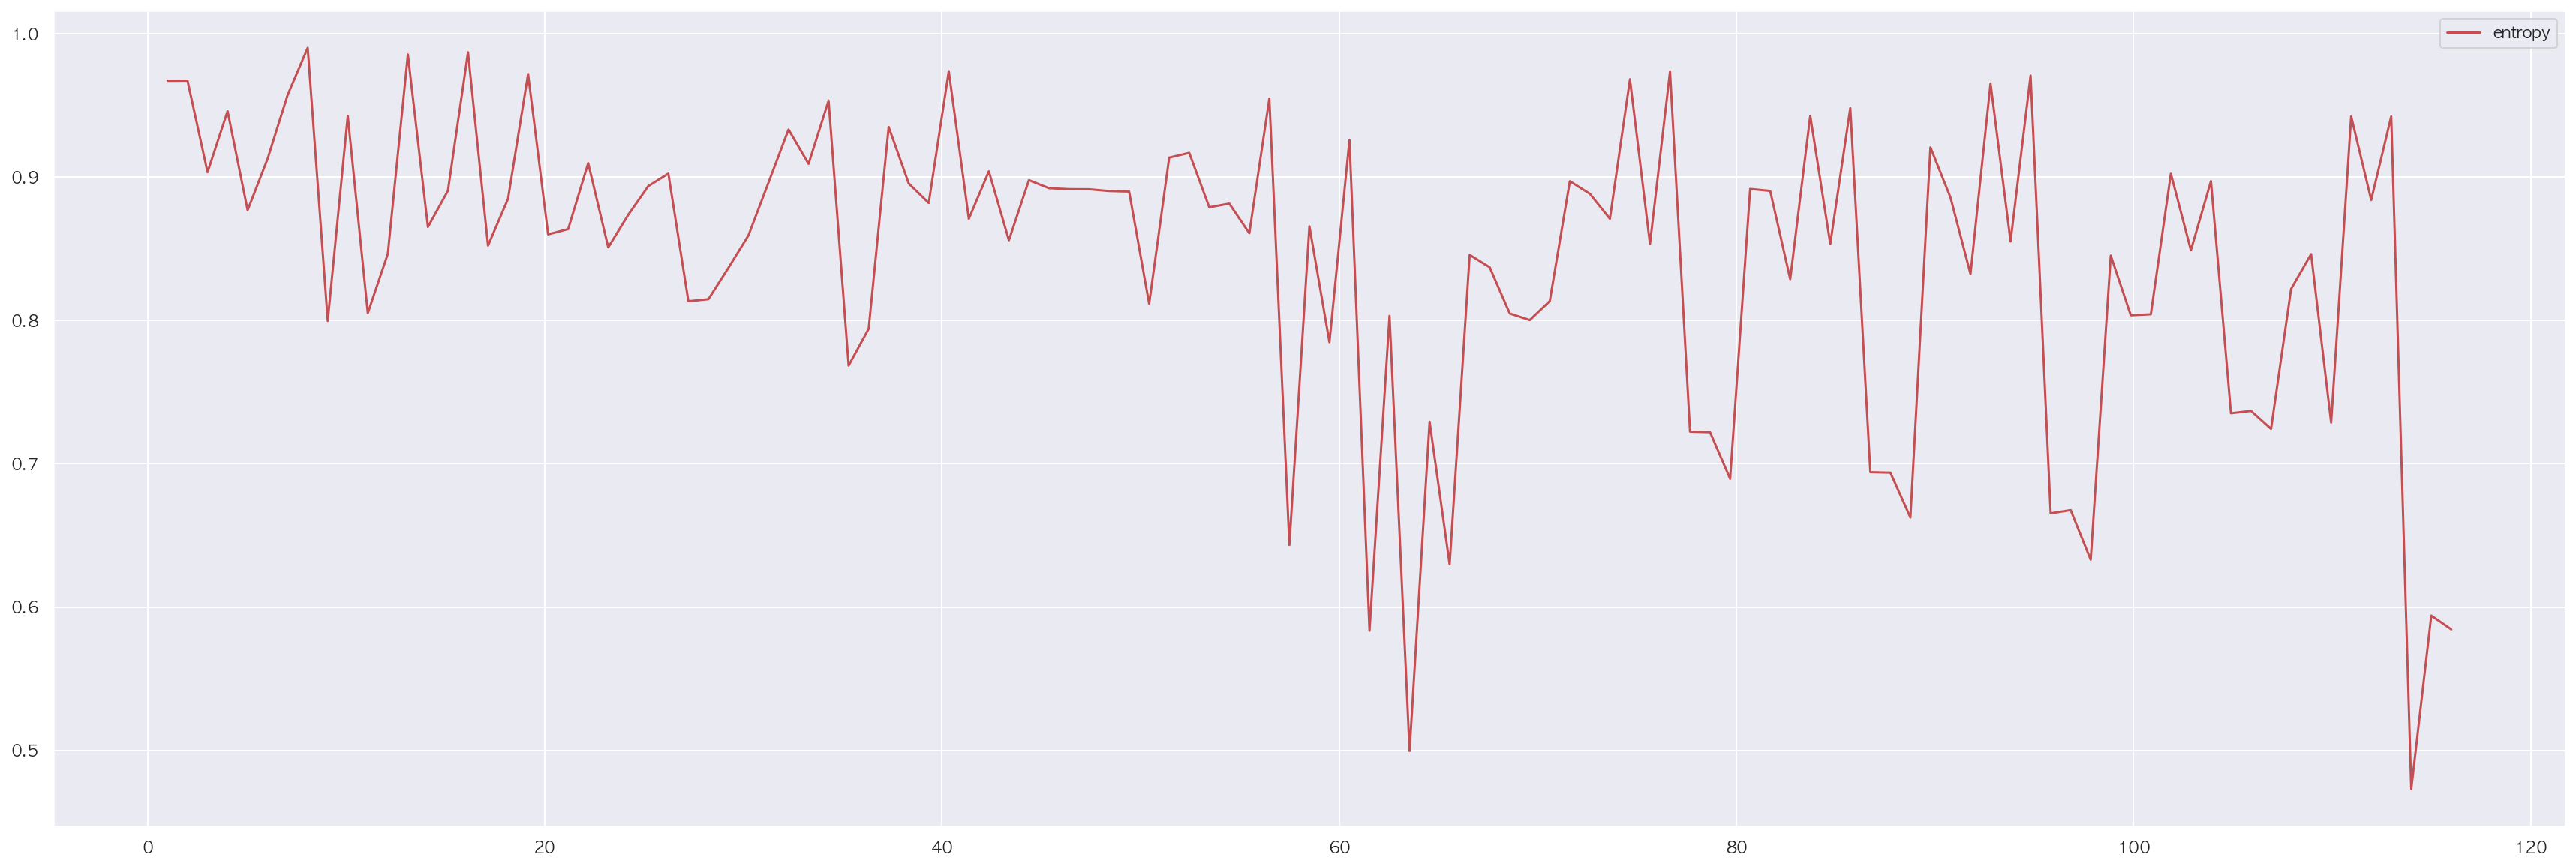

In [309]:
val_list = list(df.columns)[:-1]
result = []

for val in val_list:
    temp = sp.stats.entropy(df[val], base=49739)
    result.append(temp)

plt.figure(figsize = (30, 10))
x = np.linspace(1, 116, 115)
plt.plot(x, result, "r", label = "entropy")
plt.legend()
plt.show()

In [311]:
# 독립변수 대부분의 엔트로피 값이 0.8 이상으로 불균형한 상태.
# 의사결정트리는 정보획득량이 큰 방향으로 나아가기 때문에 엔트로피 값이 클수록 분류가 더 잘된다.
# 의사결정트리의 상위호환 모델인 랜덤포레스트 활용해 분류.

### 5.4 테스트, 트레인 데이터 분리

In [228]:
# 데이터셋 로드
df = pd.read_csv("user_log_data.csv")
df.tail(3)

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,...,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2,Type
49736,472887,6764910,1,1,15200,15200.0,619.1027,4,1,11,...,1,3,0,0,0,0,0,0,0,Human
49737,472897,7083623,1,1,12157,12157.0,41728.9706,4,1,10,...,1,2,0,0,0,0,0,0,0,Human
49738,472898,6558612,1,1,12961,12961.0,4.0054,1,1,6,...,0,0,0,0,0,0,0,0,0,Human


In [229]:
# 종속변수 원핫인코딩(Human: 0, Bot: 1)
df['Type'] = df['Type'].apply(lambda x: x.replace('Human', '0'))
df['Type'] = df['Type'].apply(lambda x: x.replace('Bot', '1'))
df['Type'] = df['Type'].astype(int)
df
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(df['Type'])
# df['Type'] = le.transform(df['Type'])

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,...,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2,Type
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,...,6,6,0,2,0,2,0,0,0,0
1,1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,...,5,9,0,2,0,2,0,0,0,0
2,1120,6596993,4,4,37867,9466.7500,60.9084,8,6,19,...,0,0,0,0,0,0,0,0,0,0
3,1164,6670686,9,9,34592,3843.5556,127755.7357,9,6,50,...,2,11,0,2,0,2,0,0,0,0
4,1184,4220231,11,11,117686,10698.7273,7589.3723,37,8,40,...,3,5,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49734,472860,11369375,1,1,12485,12485.0000,804.5126,1,1,11,...,0,0,0,0,0,0,0,0,0,0
49735,472867,8186481,1,1,14698,14698.0000,369.5057,2,1,10,...,0,0,0,0,0,0,0,0,0,0
49736,472887,6764910,1,1,15200,15200.0000,619.1027,4,1,11,...,1,3,0,0,0,0,0,0,0,0
49737,472897,7083623,1,1,12157,12157.0000,41728.9706,4,1,10,...,1,2,0,0,0,0,0,0,0,0


In [230]:
df = df.set_index(["Actor", "A_Acc"]).sort_index()
df

,,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,collect_max_count,Sit_ratio,...,m_deg,m_Wdeg,m_between2,m_closeness2,m_Eigenvector2,m_Eccentricity2,m_Authority2,m_Hub2,m_Pagerank2,Type
Actor,A_Acc,,,,,,,,,,,,,,,,,,,,,
1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,6,1.0430,...,6,6,0,2,0,2,0,0,0,0
1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,0,3.5570,...,5,9,0,2,0,2,0,0,0,0
1120,6596993,4,4,37867,9466.7500,60.9084,8,6,19,3,4.9882,...,0,0,0,0,0,0,0,0,0,0
1164,6670686,9,9,34592,3843.5556,127755.7357,9,6,50,0,0.8581,...,2,11,0,2,0,2,0,0,0,0
1184,4220231,11,11,117686,10698.7273,7589.3723,37,8,40,4,4.2667,...,3,5,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472860,11369375,1,1,12485,12485.0000,804.5126,1,1,11,0,0.1745,...,0,0,0,0,0,0,0,0,0,0
472867,8186481,1,1,14698,14698.0000,369.5057,2,1,10,10,0.3361,...,0,0,0,0,0,0,0,0,0,0
472887,6764910,1,1,15200,15200.0000,619.1027,4,1,11,0,0.2565,...,1,3,0,0,0,0,0,0,0,0


In [231]:
# train, test 데이터셋 구분
from sklearn.model_selection import train_test_split

X, y = np.array(df.iloc[:, :-1]), np.array(df["Type"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

## 6. 머신러닝

In [ ]:
# <기존 연구 결과>
# 랜덤포레스트, 에이다부스트, XG부스트, 라이트GBM, 캡부스트

# <Multimodal game bot detection using user behavioral characteristics>
    # Decision tree, Random forest, Logistic regression, Naïve Bayes 

# <행위 시간 간격 기반 게임 봇 탐지 기법>
    # KNN모델, Random Forest, Logistic Regression, Gaussian NB 모델
    # 일주일 데이터(a)와 하루 데이터(b)에 대하여 대표적인 Classification 기법들을 적용하여 게임 봇과 정상 이용자를 
    # 분류한 성능을 나타낸다. 
    # 일주일 데이터의 경우 4 가지 모델의 accuracy 는 모두 90% 이상이고, Random Forest 모델은 가장 높은 97.4% 로 
    # 나타났다. 
    # Logistic Regression 모델은 precision이 72.4%, recall 8.6%, f-measure 41.6% 로 
    # recall과 f-measure 가 낮게 나타났다. 
    # KNN 모델은 precision 74.1%, recall 43.4%, f-measure 69.2% 로 recall 이 낮게 나타났다.
    # Gaussian NB 모델은 precision, recall, f-measure 모두 낮게 나타났다.
    # 마지막으로 Random Forest 모델은 precision 100%, recall 42.3%, f-measure 88%로 recall 이 낮은 반면 
    # precision 이 높게 나타 났다. 
    # 따라서 Random Forest 모델을 적용하면 게임 봇 탐지 결과에 대해 신뢰할 수 있다.
    # 하루데이터를사용했을때가장성능이좋은 Random Forest 모델의 경우 accuracy 97.7%, precision 100%, recall 50%
    # , f-measure 90.9% 로 모두 일주일 데이터를 사용했을 때와 유사한 성능을 보였으며 오히려 다소 높은 수치가 나타났다.
    # 이는 본 연구에서 제안하는 방법은 하루 데이터만으로 장 기간에걸쳐수집한로그를이용하는것과유사한성 능으로 게임 봇을 탐지할 수
    # 있음을 의미한다.

### 6.1 랜덤포레스트 - all features

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

In [56]:
model_randomForest = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model_randomForest.fit(X_train, y_train)
print(classification_report(y_train, model_randomForest.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     30466
           1       0.90      0.62      0.73      4351

    accuracy                           0.94     34817
   macro avg       0.92      0.80      0.85     34817
weighted avg       0.94      0.94      0.94     34817



In [7]:
print(classification_report(y_test, model_randomForest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     13023
           1       0.90      0.61      0.72      1899

    accuracy                           0.94     14922
   macro avg       0.92      0.80      0.85     14922
weighted avg       0.94      0.94      0.94     14922



In [379]:
# 봇 데이터의 정밀도와 재현율의 차가 크다.
# 데이터 불균형이 있음을 짐작할 수 있다.
    # 데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다.
    # 즉, 정확도(accuracy)가 높아도 데이터 개수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생할 수 있다.
    # 이렇게 각 클래스에 속한 데이터의 개수의 차이에 의해 발생하는 문제들을 비대칭 데이터 문제(imbalanced data problem)이라고 한다.

### 6.2 다른 모델과의 비교

#### 6.2.1 로지스틱 회귀

In [ ]:
import statsmodels.api as sm

logistic = sm.Logit(y_train, X_train)
model_logistic = logistic.fit(method='newton')
y_pred = model_logistic.predict(X_train)

def cut_off(y, threshold):
    Y = y.copy() 
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

Y_pred = cut_off(y_pred, 0.5)
Y_pred

In [ ]:
print(classification_report(y_test, Y_pred))

#### 6.2.2 정규분포 나이브베이즈(GaussianNB)

In [232]:
from sklearn.naive_bayes import GaussianNB

gaussianNB = GaussianNB()
model_gaussianNB = gaussianNB.fit(X_train, y_train)

print(classification_report(y_train, model_gaussianNB.predict(X_train)))
print(classification_report(y_test, model_gaussianNB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     30466
           1       0.80      0.69      0.74      4351

    accuracy                           0.94     34817
   macro avg       0.88      0.83      0.86     34817
weighted avg       0.94      0.94      0.94     34817

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13023
           1       0.81      0.69      0.75      1899

    accuracy                           0.94     14922
   macro avg       0.88      0.83      0.86     14922
weighted avg       0.94      0.94      0.94     14922



#### 6.2.3 다항분포 나이브베이즈(MultinomialNB)

In [233]:
from sklearn.naive_bayes import MultinomialNB

multinomialNB = MultinomialNB()
model_multinomialNB = multinomialNB.fit(X_train, y_train)

print(classification_report(y_train, model_multinomialNB.predict(X_train)))
print(classification_report(y_test, model_multinomialNB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     30466
           1       0.34      0.78      0.47      4351

    accuracy                           0.78     34817
   macro avg       0.65      0.78      0.67     34817
weighted avg       0.88      0.78      0.81     34817

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     13023
           1       0.35      0.76      0.47      1899

    accuracy                           0.79     14922
   macro avg       0.65      0.77      0.67     14922
weighted avg       0.88      0.79      0.82     14922



#### 6.2.4 의사결정나무

In [236]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
model_decisionTree = decisionTree.fit(X_train, y_train)

print(classification_report(y_train, model_decisionTree.predict(X_train)))
print(classification_report(y_test, model_decisionTree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30466
           1       1.00      1.00      1.00      4351

    accuracy                           1.00     34817
   macro avg       1.00      1.00      1.00     34817
weighted avg       1.00      1.00      1.00     34817

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     13023
           1       0.66      0.68      0.67      1899

    accuracy                           0.91     14922
   macro avg       0.80      0.82      0.81     14922
weighted avg       0.92      0.91      0.91     14922



## 7. 모델 최적화

### 7.1 독립변수 선택

In [220]:
# 논문 <Multimodal game bot detection using user behavioral characteristics>

# 1. all the features(114), 2. the information gain ranking filter algorithm(62),
# 3. the best first and greedy stepwise algorithms(6)

# Feature_Set1 consists of all the features (114) mentioned in “Methods” section. 
# Feature_Set2 is composed of the top 62 features extracted by the information gain ranking filter algorithm.
# Feature_Set3 is comprised of the six features selected by the best first and greedy stepwise algorithms.
# Figure 8 shows the classification results using these three feature sets.
# Feature_Set3 presents lower per- formance than Feature_Set1 and Feature_Set2.
# In comparison, Feature_Set2 has almost the same performance as Feature_Set1
# , although the number of Feature_Set2 is barely half that of Feature_Set1.
# Thus, we finally selected Feature_Set2 for game bot detection.

#### 특징선택
- 분산에 의한 선택
- 단일 변수 선택
    - chi2: 카이제곱 검정 통계값
    - f_classif: 분산분석(ANOVA) F검정 통계값
    - mutual_info_classif: 상호정보량(mutual information)
- 다른 모형을 이용한 특성 중요도 계산

#### 7.1.1 분산에 의한 선택

In [ ]:
# 원래 예측모형에서 중요한 특징데이터란 종속데이터와의 상관관계가 크고 예측에 도움이 되는 데이터를 말한다.
# 하지만 상관관계 계산에 앞서 특징데이터의 값 자체가 표본에 따라 그다지 변하지 않는다면 종속데이터 예측에도 도움이 되지 않을 가능성이 높다.
# 표본 변화에 따른 데이터 값의 변화 즉, 분산이 기준치보다 낮은 특징 데이터는 사용하지 않는 방법이 분산에 의한 선택 방법이다.
# 예를 들어 종속데이터와 특징데이터가 모두 0 또는 1 두가지 값만 가지는데
# 종속데이터는 0과 1이 균형을 이루는데 반해 특징데이터가 대부분(예를 들어 90%)의 값이 0이라면 이 특징데이터는 분류에 도움이 되지 않을 가능성이 높다.
# 하지만 분산에 의한 선택은 반드시 상관관계와 일치한다는 보장이 없기 때문에 신중하게 사용해야 한다.

In [87]:
from sklearn.feature_selection import VarianceThreshold

selector1 = VarianceThreshold(1e+4)
X_train_var = selector1.fit_transform(X_train)
X_test_var = selector1.transform(X_test)
X_train_var.shape

(34817, 28)

In [88]:
# 랜덤포레스트 정확도
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model.fit(X_train_var, y_train)

print("train accuracy:{:5.3f}".format(accuracy_score(y_train, model.predict(X_train_var))))
print("test accuracy :{:5.3f}".format(accuracy_score(y_test, model.predict(X_test_var))))

train accuracy:0.949
test accuracy :0.945


#### 7.1.2 단일 변수 선택 : chi2: 카이제곱 검정 통계값

In [353]:
# 랜덤포레스트 정확도
from sklearn.ensemble import RandomForestClassifier

train_accuracy_chi2 = []
test_accuracy_chi2 = []
model = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)

for k_val in tqdm(range(1, len(X_train[0])+1)):
    selector2 = SelectKBest(chi2, k=k_val)
    X_train_chi2 = selector2.fit_transform(X_train, y_train)
    X_test_chi2 = selector2.transform(X_test)

    model.fit(X_train_chi2, y_train)
    train_accuracy_chi2.append(accuracy_score(y_train, model.predict(X_train_chi2)))
    test_accuracy_chi2.append(accuracy_score(y_test, model.predict(X_test_chi2)))



  0%|          | 0/115 [00:00<?, ?it/s]

  1%|          | 1/115 [00:02<04:07,  2.17s/it]

  2%|▏         | 2/115 [00:04<03:59,  2.12s/it]

  3%|▎         | 3/115 [00:05<03:43,  1.99s/it]

  3%|▎         | 4/115 [00:08<03:52,  2.10s/it]

  4%|▍         | 5/115 [00:10<03:55,  2.14s/it]

  5%|▌         | 6/115 [00:12<03:55,  2.16s/it]

  6%|▌         | 7/115 [00:14<03:55,  2.18s/it]

  7%|▋         | 8/115 [00:17<03:55,  2.20s/it]

  8%|▊         | 9/115 [00:19<04:09,  2.35s/it]

  9%|▊         | 10/115 [00:22<04:18,  2.46s/it]

 10%|▉         | 11/115 [00:25<04:23,  2.54s/it]

 10%|█         | 12/115 [00:28<04:28,  2.61s/it]

 11%|█▏        | 13/115 [00:31<04:37,  2.72s/it]

 12%|█▏        | 14/115 [00:33<04:35,  2.72s/it]

 13%|█▎        | 15/115 [00:36<04:38,  2.79s/it]

 14%|█▍        | 16/115 [00:39<04:43,  2.87s/it]

 15%|█▍        | 17/115 [00:42<04:43,  2.90s/it]

 16%|█▌        | 18/115 [00:45<04:43,  2.92s/it]

 17%|█▋        | 19/115 [00:48<04:47,  2.99s/it]

 17%|█▋        |

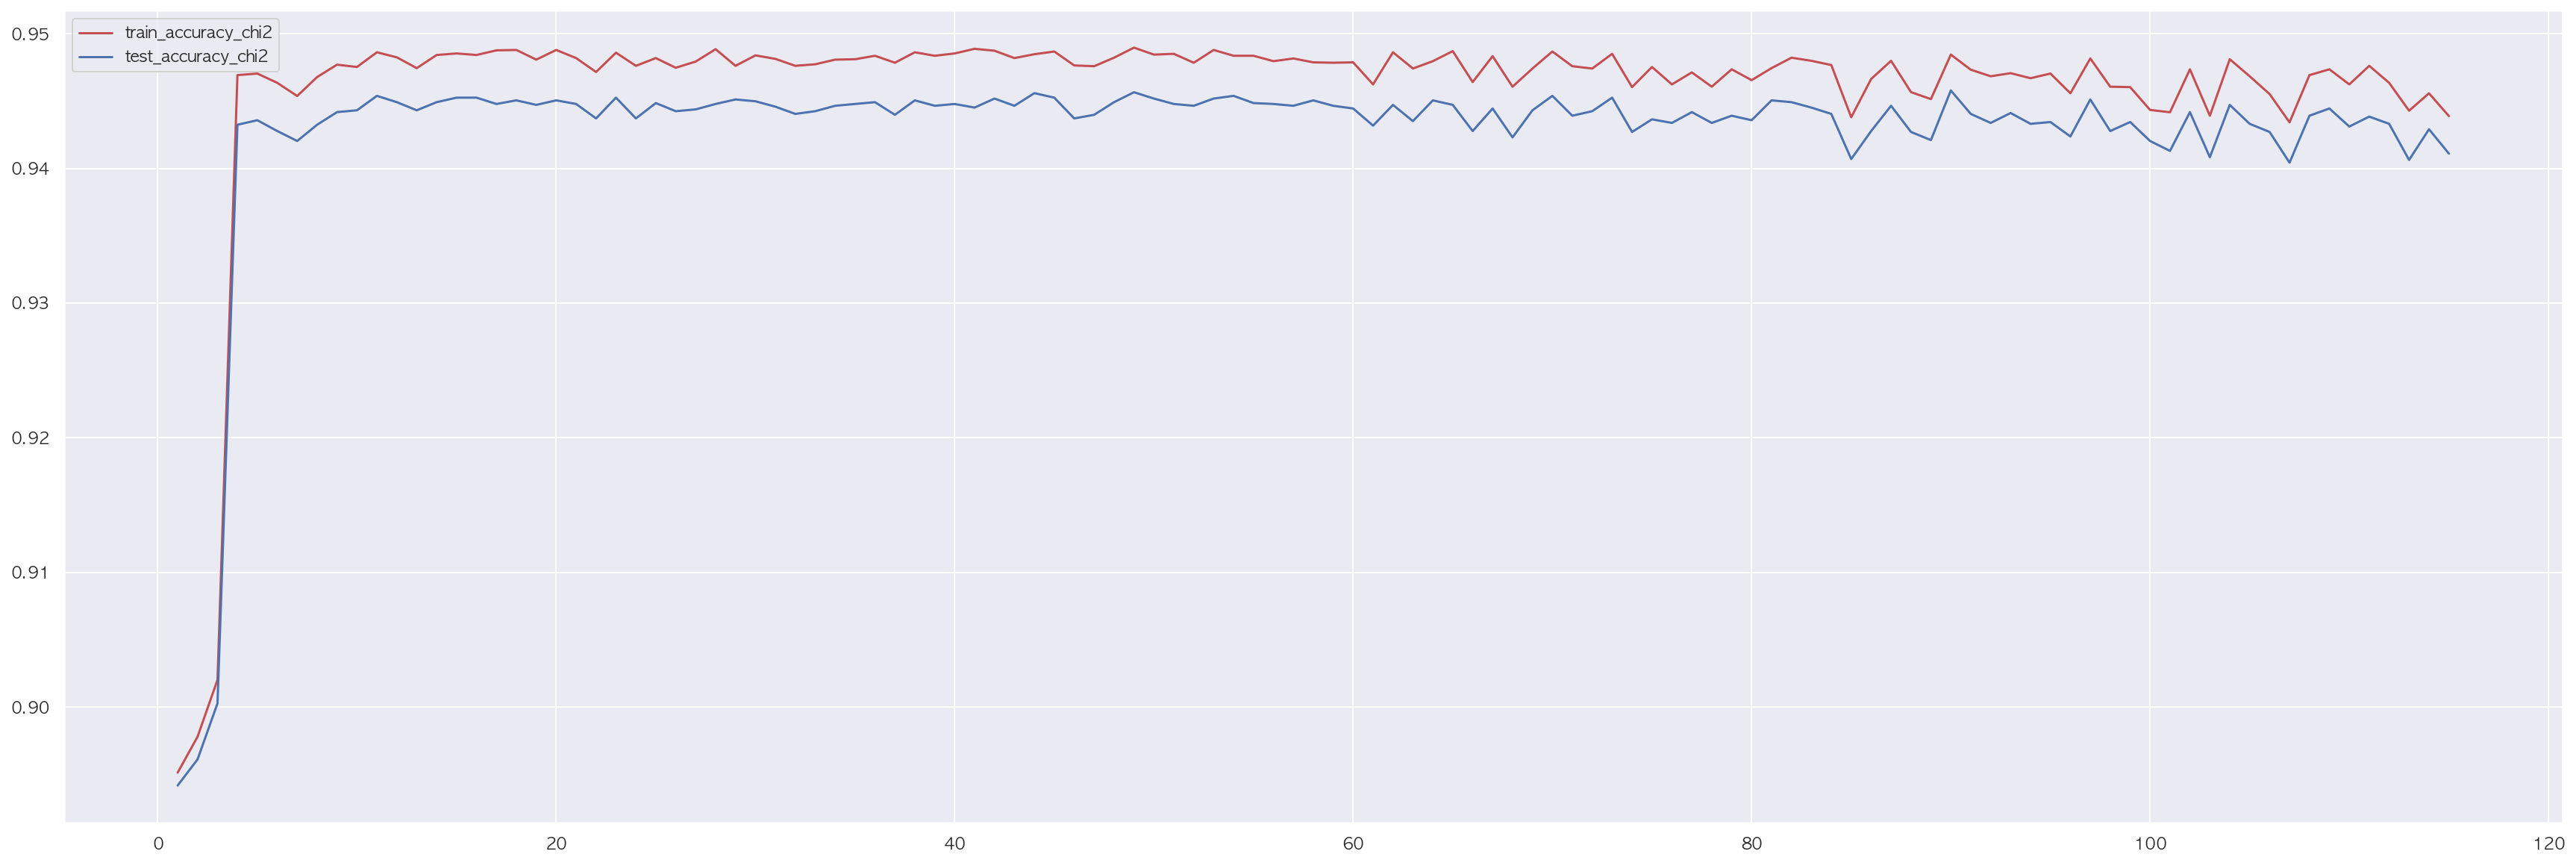

In [354]:
plt.figure(figsize = (30, 10))
x = np.linspace(1, 115, 115)

plt.plot(x, train_accuracy_chi2, "r", label = "train_accuracy_chi2")
plt.plot(x, test_accuracy_chi2, "b", label = "test_accuracy_chi2")

plt.legend()
plt.show()

In [ ]:
# li_mic = list(zip(train_accuracy_mic, test_accuracy_mic))
# li_mic[12]

#### 7.1.3 단일 변수 선택 : f_classif: 분산분석(ANOVA) F검정 통계값

In [356]:
# 랜덤포레스트 정확도
from sklearn.feature_selection import f_classif, SelectKBest

train_accuracy_f_classif = []
test_accuracy_f_classif = []
model = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)

for k_val in tqdm(range(1, len(X_train[0])+1)):
    selector3 = SelectKBest(f_classif, k=k_val)
    X_train_f_classif = selector3.fit_transform(X_train, y_train)
    X_test_f_classif = selector3.transform(X_test)
    
    model.fit(X_train_f_classif, y_train)
    train_accuracy_f_classif.append(accuracy_score(y_train, model.predict(X_train_f_classif)))
    test_accuracy_f_classif.append(accuracy_score(y_test, model.predict(X_test_f_classif)))




  0%|          | 0/115 [00:00<?, ?it/s]


  1%|          | 1/115 [00:02<04:23,  2.31s/it]


  2%|▏         | 2/115 [00:04<04:16,  2.27s/it]


  3%|▎         | 3/115 [00:06<04:07,  2.21s/it]


  3%|▎         | 4/115 [00:09<04:20,  2.34s/it]


  4%|▍         | 5/115 [00:11<04:31,  2.47s/it]


  5%|▌         | 6/115 [00:14<04:39,  2.57s/it]


  6%|▌         | 7/115 [00:17<04:50,  2.69s/it]


  7%|▋         | 8/115 [00:20<04:42,  2.64s/it]


  8%|▊         | 9/115 [00:23<04:57,  2.80s/it]


  9%|▊         | 10/115 [00:26<05:01,  2.87s/it]


 10%|▉         | 11/115 [00:29<04:54,  2.83s/it]


 10%|█         | 12/115 [00:32<04:58,  2.90s/it]


 11%|█▏        | 13/115 [00:35<05:05,  2.99s/it]


 12%|█▏        | 14/115 [00:38<05:10,  3.07s/it]


 13%|█▎        | 15/115 [00:42<05:29,  3.29s/it]


 14%|█▍        | 16/115 [00:45<05:27,  3.31s/it]


 15%|█▍        | 17/115 [00:50<05:47,  3.54s/it]


 16%|█▌        | 18/115 [00:53<05:28,  3.39s/it]


 17%|█▋        | 19/115 [00:56<05:35,  3.49s/i

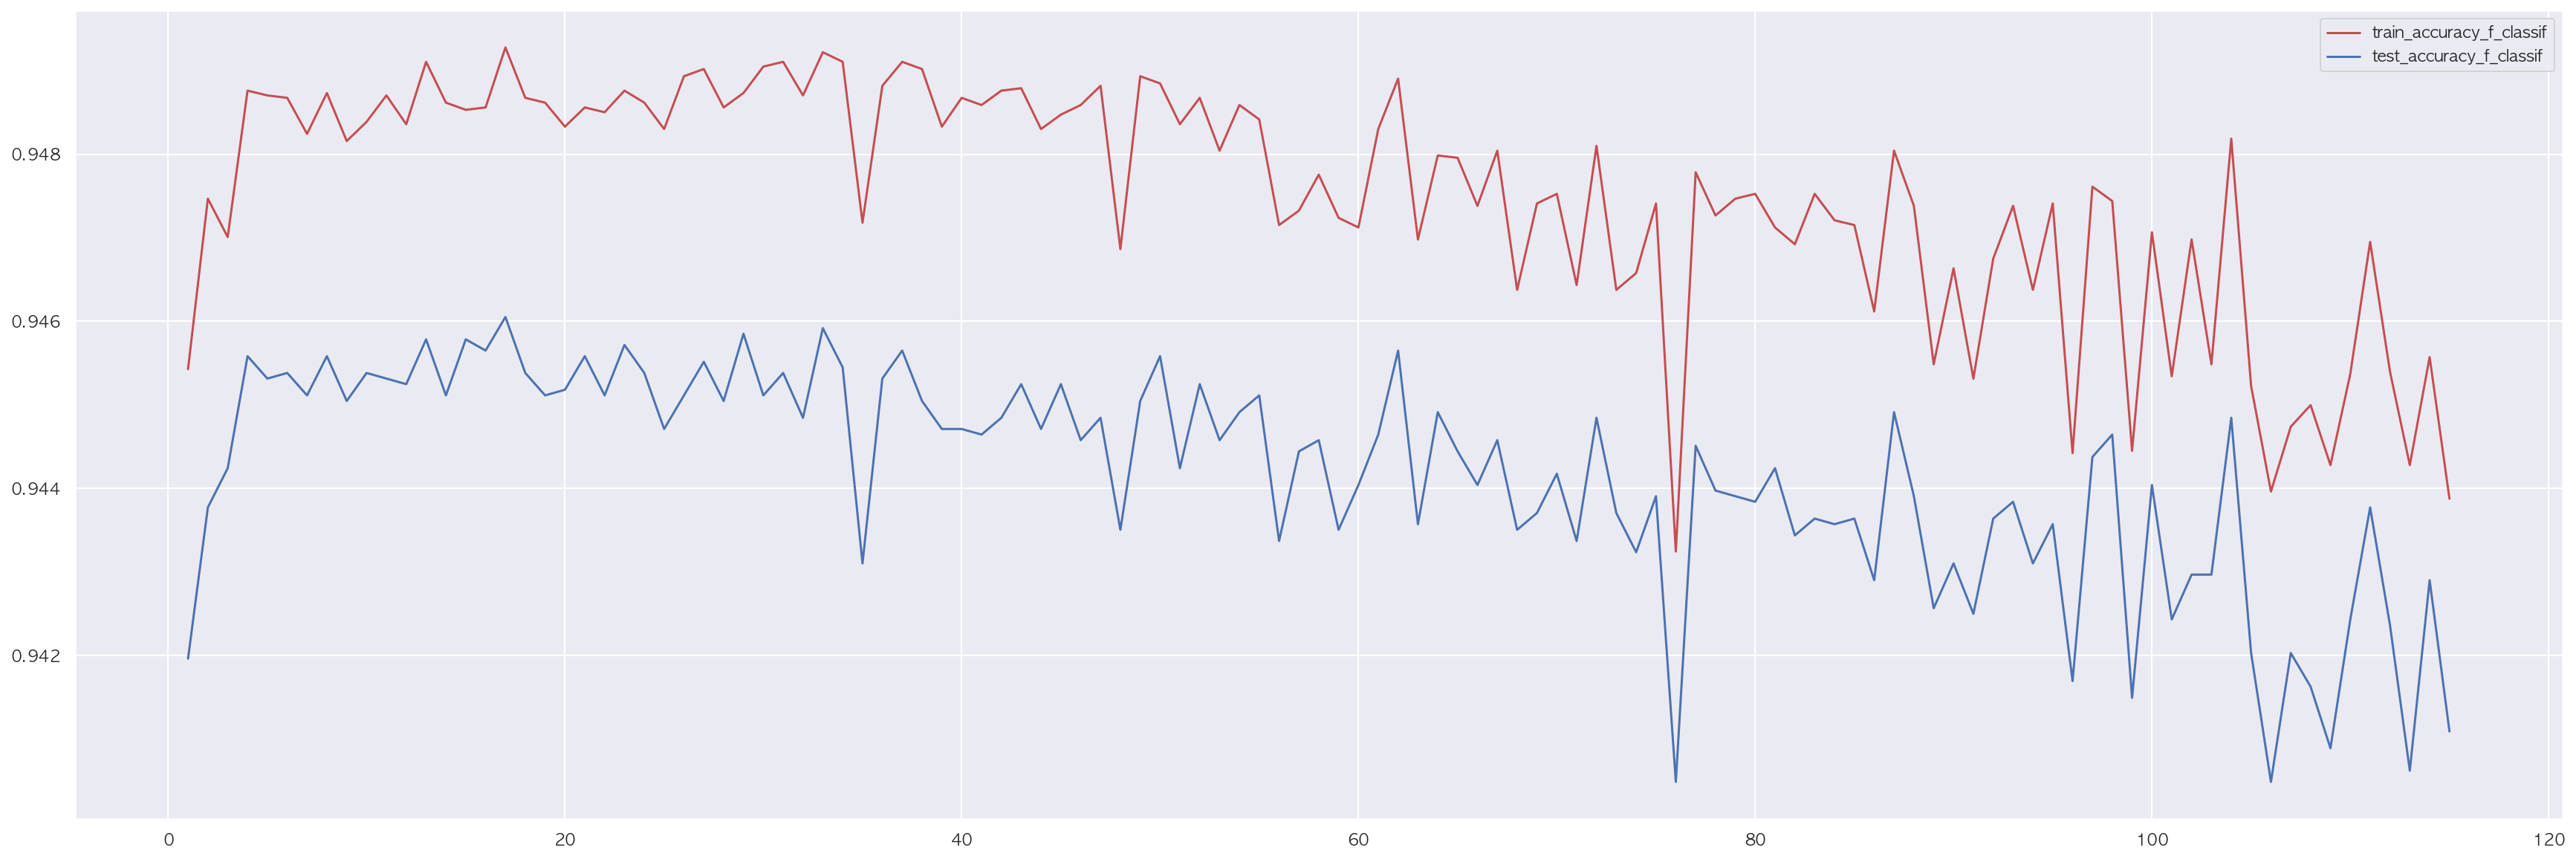

In [357]:
plt.figure(figsize = (30, 10))
x = np.linspace(1, 115, 115)

plt.plot(x, train_accuracy_f_classif, "r", label = "train_accuracy_f_classif")
plt.plot(x, test_accuracy_f_classif, "b", label = "test_accuracy_f_classif")

plt.legend()
plt.show()

In [ ]:
# li_mic = list(zip(train_accuracy_mic, test_accuracy_mic))
# li_mic[12]

#### 7.1.4 단일 변수 선택 : mutual_info_classif: 상호정보량(mutual information)

In [369]:
# 랜덤포레스트 정확도
from sklearn.feature_selection import mutual_info_classif, SelectKBest

train_accuracy_mic = []
test_accuracy_mic = []
model = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)

for k_val in tqdm(range(20, 21)):
    selector4 = SelectKBest(mutual_info_classif, k=k_val)
    X_train_mic = selector4.fit_transform(X_train, y_train)
    X_test_mic = selector4.transform(X_test)
    
    model.fit(X_train_mic, y_train)
    train_accuracy_mic.append(accuracy_score(y_train, model.predict(X_train_mic)))
    test_accuracy_mic.append(accuracy_score(y_test, model.predict(X_test_mic)))




  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:52<00:00, 52.21s/it]


In [370]:
# 랜덤포레스트 정확도
train_accuracy_mic, test_accuracy_mic

([0.94870321969153], [0.9448465353169816])

In [ ]:
# plt.figure(figsize = (30, 10))
# x = np.linspace(1, 115, 115)

# plt.plot(x, train_accuracy_mic2, "r", label = "train_accuracy_mic2")
# plt.plot(x, test_accuracy_mic2, "b", label = "test_accuracy_mic2")

# plt.legend()
# plt.show()

In [ ]:
# li_mic = list(zip(train_accuracy_mic, test_accuracy_mic))
# li_mic[12]

#### 7.1.5 다른 모형을 이용한 특성 중요도 계산

In [384]:
# Extremely Randomized Trees(ExtraTreesClassifier)

In [132]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [85]:
%%time
n_sample = 10000
idx = np.random.choice(range(len(y_train)), n_sample)
model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train[idx, :], y_train[idx])
selector = SelectFromModel(model_sel, prefit=True, max_features=115)
X_train_rf = selector.transform(X_train)
X_test_rf = selector.transform(X_test)

X_train_rf.shape

CPU times: user 1.2 s, sys: 49.6 ms, total: 1.25 s
Wall time: 1.29 s


(34817, 31)

In [86]:
# 랜덤포레스트 정확도
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model.fit(X_train_rf, y_train)

print("train accuracy:{:5.3f}".format(accuracy_score(y_train, model.predict(X_train_rf))))
print("test accuracy :{:5.3f}".format(accuracy_score(y_test, model.predict(X_test_rf))))

train accuracy:0.949
test accuracy :0.945


In [386]:
# 변수 선택 모델간 정확도 최대치는 0.949 정도로 큰 차이가 없는 것을 확인할 수 있다.
# 변수 개수를 가장 줄여주는 모델 중 하나인 Extremely Randomized Trees를 변수 선택 방법으로 결정.

### 7.2 샘플링

- 비대칭 데이터는 다수 클래스 데이터에서 일부만 사용하는 언더 샘플링이나 소수 클래스 데이터를 증가시키는 오버 샘플링을 사용하여 데이터 비율을 맞추면 정밀도(precision)가 향상된다.
    - 오버샘플링(Over-Sampling)
    - 언더샘플링(Under-Sampling)
    - 복합샘플링(Combining Over-and Under-Sampling)

#### 7.2.1 언더샘플링

- RandomUnderSampler: random under-sampling method
- TomekLinks: Tomek’s link method
- CondensedNearestNeighbour: condensed nearest neighbour method
- OneSidedSelection: under-sampling based on one-sided selection method
- EditedNearestNeighbours: edited nearest neighbour method
- NeighbourhoodCleaningRule: neighbourhood cleaning rule

In [89]:
from imblearn.under_sampling import *

# RandomUnderSampler
X_train_samp_rus, y_train_samp_rus = RandomUnderSampler(random_state=0).fit_sample(X_train, y_train)
X_test_samp_rus, y_test_samp_rus = RandomUnderSampler(random_state=0).fit_sample(X_test, y_test)

# Extremely Randomized Trees 통한 변수 선택
n_sample = 10000
idx = np.random.choice(range(len(y_train_samp_rus)), n_sample)
model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train_samp_rus[idx, :], y_train_samp_rus[idx])
selector = SelectFromModel(model_sel, prefit=True, max_features=115)
X_train_samp_rus_rf = selector.transform(X_train_samp_rus)
X_test_samp_rus_rf = selector.transform(X_test_samp_rus)

# 랜덤포레스트 정확도
model_rf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model_rf.fit(X_train_samp_rus_rf, y_train_samp_rus)

print(classification_report(y_train_samp_rus, model_rf.predict(X_train_samp_rus_rf)))
print(classification_report(y_test_samp_rus, model_rf.predict(X_test_samp_rus_rf)))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4351
           1       0.95      0.74      0.83      4351

    accuracy                           0.85      8702
   macro avg       0.87      0.85      0.84      8702
weighted avg       0.87      0.85      0.84      8702

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      1899
           1       0.96      0.73      0.83      1899

    accuracy                           0.85      3798
   macro avg       0.87      0.85      0.85      3798
weighted avg       0.87      0.85      0.85      3798



In [91]:
# OneSidedSelection
X_train_samp_oss, y_train_samp_oss = OneSidedSelection(random_state=0).fit_sample(X_train, y_train)
X_test_samp_oss, y_test_samp_oss = OneSidedSelection(random_state=0).fit_sample(X_test, y_test)

# Extremely Randomized Trees 통한 변수 선택
n_sample = 10000
idx = np.random.choice(range(len(y_train_samp_oss)), n_sample)
model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train_samp_oss[idx, :], y_train_samp_oss[idx])
selector = SelectFromModel(model_sel, prefit=True, max_features=115)
X_train_samp_oss_rf = selector.transform(X_train_samp_oss)
X_test_samp_oss_rf = selector.transform(X_test_samp_oss)

# 랜덤포레스트 정확도
model_rf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model_rf.fit(X_train_samp_oss_rf, y_train_samp_oss)

print(classification_report(y_train_samp_oss, model_rf.predict(X_train_samp_oss_rf)))
print(classification_report(y_test_samp_oss, model_rf.predict(X_test_samp_oss_rf)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29835
           1       0.91      0.67      0.78      4351

    accuracy                           0.95     34186
   macro avg       0.93      0.83      0.87     34186
weighted avg       0.95      0.95      0.95     34186

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12656
           1       0.91      0.66      0.77      1899

    accuracy                           0.95     14555
   macro avg       0.93      0.83      0.87     14555
weighted avg       0.95      0.95      0.94     14555



In [92]:
# Neighbourhood Cleaning Rule
X_train_samp_ncr, y_train_samp_ncr = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5).fit_sample(X_train, y_train)
X_test_samp_ncr, y_test_samp_ncr = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5).fit_sample(X_test, y_test)

# Extremely Randomized Trees 통한 변수 선택
n_sample = 10000
idx = np.random.choice(range(len(y_train_samp_ncr)), n_sample)
model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train_samp_ncr[idx, :], y_train_samp_ncr[idx])
selector = SelectFromModel(model_sel, prefit=True, max_features=115)
X_train_samp_ncr_rf = selector.transform(X_train_samp_ncr)
X_test_samp_ncr_rf = selector.transform(X_test_samp_ncr)

# 랜덤포레스트 정확도
model_rf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model_rf.fit(X_train_samp_ncr_rf, y_train_samp_ncr)

print(classification_report(y_train_samp_ncr, model_rf.predict(X_train_samp_ncr_rf)))
print(classification_report(y_test_samp_ncr, model_rf.predict(X_test_samp_ncr_rf)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     24649
           1       0.98      0.68      0.80      4351

    accuracy                           0.95     29000
   macro avg       0.96      0.84      0.89     29000
weighted avg       0.95      0.95      0.95     29000

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10214
           1       0.99      0.68      0.80      1899

    accuracy                           0.95     12113
   macro avg       0.97      0.84      0.89     12113
weighted avg       0.95      0.95      0.94     12113



In [45]:
# Neighbourhood Cleaning Rule이 정확도 0.95, 정밀도 0.98, 재현율 0.68로 가장 좋은 성능을 보여줌.
# 휴먼과 봇 데이터 간 비율 격차가 줄어들긴 했으나 여전히 차이가 많이 남.

#### 7.2.2 오버 샘플링

- RandomOverSampler: random sampler
- ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning
- SMOTE: Synthetic Minority Over-sampling Technique

In [93]:
from imblearn.over_sampling import *

# RandomOverSampler 
X_train_samp_ros, y_train_samp_ros = RandomOverSampler(random_state=0).fit_sample(X_train, y_train)
X_test_samp_ros, y_test_samp_ros = RandomOverSampler(random_state=0).fit_sample(X_test, y_test)

# Extremely Randomized Trees 통한 변수 선택
n_sample = 10000
idx = np.random.choice(range(len(y_train_samp_ros)), n_sample)
model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train_samp_ros[idx, :], y_train_samp_ros[idx])
selector = SelectFromModel(model_sel, prefit=True, max_features=115)
X_train_samp_ros_rf = selector.transform(X_train_samp_ros)
X_test_samp_ros_rf = selector.transform(X_test_samp_ros)

# 랜덤포레스트 정확도
model_rf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model_rf.fit(X_train_samp_ros_rf, y_train_samp_ros)

print(classification_report(y_train_samp_ros, model_rf.predict(X_train_samp_ros_rf)))
print(classification_report(y_test_samp_ros, model_rf.predict(X_test_samp_ros_rf)))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87     30466
           1       0.96      0.73      0.83     30466

    accuracy                           0.85     60932
   macro avg       0.87      0.85      0.85     60932
weighted avg       0.87      0.85      0.85     60932

              precision    recall  f1-score   support

           0       0.78      0.97      0.86     13023
           1       0.96      0.73      0.83     13023

    accuracy                           0.85     26046
   macro avg       0.87      0.85      0.85     26046
weighted avg       0.87      0.85      0.85     26046



In [94]:
# ADASYN
X_train_samp_ada, y_train_samp_ada = ADASYN(random_state=0).fit_sample(X_train, y_train)
X_test_samp_ada, y_test_samp_ada = ADASYN(random_state=0).fit_sample(X_test, y_test)

# Extremely Randomized Trees 통한 변수 선택
n_sample = 10000
idx = np.random.choice(range(len(y_train_samp_ada)), n_sample)
model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train_samp_ada[idx, :], y_train_samp_ada[idx])
selector = SelectFromModel(model_sel, prefit=True, max_features=115)
X_train_samp_ada_rf = selector.transform(X_train_samp_ada)
X_test_samp_ada_rf = selector.transform(X_test_samp_ada)

# 랜덤포레스트 정확도
model_rf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model_rf.fit(X_train_samp_ada_rf, y_train_samp_ada)

print(classification_report(y_train_samp_ada, model_rf.predict(X_train_samp_ada_rf)))
print(classification_report(y_test_samp_ada, model_rf.predict(X_test_samp_ada_rf)))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78     30466
           1       0.82      0.71      0.76     31248

    accuracy                           0.77     61714
   macro avg       0.78      0.77      0.77     61714
weighted avg       0.78      0.77      0.77     61714

              precision    recall  f1-score   support

           0       0.77      0.84      0.80     13023
           1       0.82      0.74      0.78     12822

    accuracy                           0.79     25845
   macro avg       0.79      0.79      0.79     25845
weighted avg       0.79      0.79      0.79     25845



In [39]:
# 오버샘플링은 전반적으로 정확도가 낮게 나온다.

#### 7.2.3 복합 샘플링

- SMOTEENN: SMOTE + ENN
- SMOTETomek: SMOTE + Tomek

In [95]:
from imblearn.combine import *

# SMOTE+ENN
X_train_samp_smen, y_train_samp_smen = SMOTEENN(random_state=0).fit_sample(X_train, y_train)
X_test_samp_smen, y_test_samp_smen = SMOTEENN(random_state=0).fit_sample(X_test, y_test)

# Extremely Randomized Trees 통한 변수 선택
n_sample = 10000
idx = np.random.choice(range(len(y_train_samp_smen)), n_sample)
model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train_samp_smen[idx, :], y_train_samp_smen[idx])
selector = SelectFromModel(model_sel, prefit=True, max_features=115)
X_train_samp_smen_rf = selector.transform(X_train_samp_smen)
X_test_samp_smen_rf = selector.transform(X_test_samp_smen)

# 랜덤포레스트 정확도
model_rf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model_rf.fit(X_train_samp_smen_rf, y_train_samp_smen)

print(classification_report(y_train_samp_smen, model_rf.predict(X_train_samp_smen_rf)))
print(classification_report(y_test_samp_smen, model_rf.predict(X_test_samp_smen_rf)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     23780
           1       0.98      0.81      0.89     27724

    accuracy                           0.89     51504
   macro avg       0.90      0.90      0.89     51504
weighted avg       0.91      0.89      0.89     51504

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      9838
           1       0.99      0.81      0.89     11636

    accuracy                           0.89     21474
   macro avg       0.90      0.90      0.89     21474
weighted avg       0.91      0.89      0.89     21474



In [96]:
# SMOTE+Tomek
X_train_samp_smto, y_train_samp_smto = SMOTETomek(random_state=4).fit_sample(X_train, y_train)
X_test_samp_smto, y_test_samp_smto = SMOTETomek(random_state=4).fit_sample(X_test, y_test)

# Extremely Randomized Trees 통한 변수 선택
n_sample = 10000
idx = np.random.choice(range(len(y_train_samp_smto)), n_sample)
model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train_samp_smto[idx, :], y_train_samp_smto[idx])
selector = SelectFromModel(model_sel, prefit=True, max_features=115)
X_train_samp_smto_rf = selector.transform(X_train_samp_smto)
X_test_samp_smto_rf = selector.transform(X_test_samp_smto)

# 랜덤포레스트 정확도
model_rf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model_rf.fit(X_train_samp_smto_rf, y_train_samp_smto)

print(classification_report(y_train_samp_smto, model_rf.predict(X_train_samp_smto_rf)))
print(classification_report(y_test_samp_smto, model_rf.predict(X_test_samp_smto_rf)))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     29998
           1       0.97      0.74      0.84     29998

    accuracy                           0.86     59996
   macro avg       0.88      0.86      0.85     59996
weighted avg       0.88      0.86      0.85     59996

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     12760
           1       0.97      0.74      0.84     12760

    accuracy                           0.86     25520
   macro avg       0.88      0.86      0.86     25520
weighted avg       0.88      0.86      0.86     25520



In [55]:
# SMOTE+ENN 방법이 샘플링이 잘 되면서 정확도 0.89, 정밀도 0.98, 재현율 0.81로 좋은 성능을 보여주고 있음.

In [98]:
# Neighbourhood Cleaning Rule(정확도 0.95, 정밀도 0.98, 재현율 0.68)과 SMOTE+ENN 두 방법으로 진행.

### 7.3 하이퍼 파라미터 튜닝

- Scikit-Learn 의 모형 하이퍼 파라미터 튜닝 도구¶
- validation_curve : 단일 하이퍼 파라미터 최적화
- GridSearchCV : 그리드를 사용한 복수 하이퍼 파라미터 최적화
- ParameterGrid : 복수 파라미터 최적화용 그리드

In [ ]:
# X_train_samp_ncr_rf, y_train_samp_ncr, X_test_samp_ncr_rf, y_test_samp_ncr

#### 7.3.1 Neighbourhood Cleaning Rule 방법으로 샘플링

In [142]:
train_accuracy1 = []
test_accuracy1 = []

for depth in tqdm(range(1, 16)):
    for estimator in tqdm(range(1, 116)):
        model_rf2 = RandomForestClassifier(max_depth=depth, n_estimators=estimator, random_state=0)
        model_rf2.fit(X_train_samp_ncr_rf, y_train_samp_ncr)
        train_accuracy1.append(accuracy_score(y_train_samp_ncr, model_rf2.predict(X_train_samp_ncr_rf)))
        test_accuracy1.append(accuracy_score(y_test_samp_ncr, model_rf2.predict(X_test_samp_ncr_rf)))


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  2%|▏         | 2/115 [00:00<00:05, 19.70it/s]

  3%|▎         | 3/115 [00:00<00:08, 13.49it/s]

  3%|▎         | 4/115 [00:00<00:09, 11.11it/s]

  4%|▍         | 5/115 [00:00<00:11,  9.42it/s]

  5%|▌         | 6/115 [00:00<00:14,  7.54it/s]

  6%|▌         | 7/115 [00:00<00:16,  6.68it/s]

  7%|▋         | 8/115 [00:01<00:20,  5.26it/s]

  8%|▊         | 9/115 [00:01<00:23,  4.43it/s]

  9%|▊         | 10/115 [00:01<00:24,  4.23it/s]

 10%|▉         | 11/115 [00:02<00:25,  4.07it/s]

 10%|█         | 12/115 [00:02<00:28,  3.57it/s]

 11%|█▏        | 13/115 [00:02<00:32,  3.12it/s]

 12%|█▏        | 14/115 [00:03<00:34,  2.95it/s]

 13%|█▎        | 15/115 [00:03<00:36,  2.76it/s]

 14%|█▍        | 16/115 [00:03<00:35,  2.79it/s]

 15%|█▍        | 17/115 [00:04<00:35,  2.79it/s]

 16%|█▌        | 18/115 [00:04<00:37,  2.60it/s]

 17%|█▋        | 19/115 [00:05<00:44,  2.15it/s]

 17%|█▋        | 20/115 [0

 52%|█████▏    | 60/115 [01:03<01:43,  1.88s/it]

 53%|█████▎    | 61/115 [01:05<01:46,  1.97s/it]

 54%|█████▍    | 62/115 [01:07<01:49,  2.06s/it]

 55%|█████▍    | 63/115 [01:10<01:49,  2.11s/it]

 56%|█████▌    | 64/115 [01:12<01:47,  2.11s/it]

 57%|█████▋    | 65/115 [01:14<01:53,  2.27s/it]

 57%|█████▋    | 66/115 [01:17<01:57,  2.39s/it]

 58%|█████▊    | 67/115 [01:19<01:52,  2.34s/it]

 59%|█████▉    | 68/115 [01:22<01:48,  2.31s/it]

 60%|██████    | 69/115 [01:24<01:46,  2.31s/it]

 61%|██████    | 70/115 [01:26<01:47,  2.39s/it]

 62%|██████▏   | 71/115 [01:29<01:50,  2.52s/it]

 63%|██████▎   | 72/115 [01:31<01:43,  2.41s/it]

 63%|██████▎   | 73/115 [01:34<01:38,  2.34s/it]

 64%|██████▍   | 74/115 [01:36<01:38,  2.39s/it]

 65%|██████▌   | 75/115 [01:39<01:39,  2.50s/it]

 66%|██████▌   | 76/115 [01:41<01:35,  2.44s/it]

 67%|██████▋   | 77/115 [01:44<01:37,  2.57s/it]

 68%|██████▊   | 78/115 [01:47<01:35,  2.58s/it]

 69%|██████▊   | 79/115 [01:49<01:30,  2.52s/it]



  3%|▎         | 4/115 [00:00<00:18,  5.92it/s]

  4%|▍         | 5/115 [00:00<00:23,  4.73it/s]

  5%|▌         | 6/115 [00:01<00:27,  3.89it/s]

  6%|▌         | 7/115 [00:01<00:33,  3.23it/s]

  7%|▋         | 8/115 [00:02<00:38,  2.77it/s]

  8%|▊         | 9/115 [00:02<00:43,  2.43it/s]

  9%|▊         | 10/115 [00:03<00:48,  2.16it/s]

 10%|▉         | 11/115 [00:04<00:55,  1.87it/s]

 10%|█         | 12/115 [00:04<01:00,  1.70it/s]

 11%|█▏        | 13/115 [00:05<01:04,  1.57it/s]

 12%|█▏        | 14/115 [00:06<01:09,  1.45it/s]

 13%|█▎        | 15/115 [00:07<01:14,  1.35it/s]

 14%|█▍        | 16/115 [00:08<01:18,  1.26it/s]

 15%|█▍        | 17/115 [00:09<01:23,  1.17it/s]

 16%|█▌        | 18/115 [00:10<01:28,  1.09it/s]

 17%|█▋        | 19/115 [00:11<01:37,  1.01s/it]

 17%|█▋        | 20/115 [00:12<01:41,  1.07s/it]

 18%|█▊        | 21/115 [00:13<01:46,  1.13s/it]

 19%|█▉        | 22/115 [00:15<01:50,  1.19s/it]

 20%|██        | 23/115 [00:16<01:52,  1.22s/it]

 21%|█

 54%|█████▍    | 62/115 [02:26<03:58,  4.51s/it]

 55%|█████▍    | 63/115 [02:31<03:54,  4.50s/it]

 56%|█████▌    | 64/115 [02:35<03:50,  4.52s/it]

 57%|█████▋    | 65/115 [02:40<03:46,  4.54s/it]

 57%|█████▋    | 66/115 [02:45<03:43,  4.57s/it]

 58%|█████▊    | 67/115 [02:49<03:42,  4.63s/it]

 59%|█████▉    | 68/115 [02:54<03:40,  4.70s/it]

 60%|██████    | 69/115 [02:59<03:39,  4.77s/it]

 61%|██████    | 70/115 [03:04<03:38,  4.86s/it]

 62%|██████▏   | 71/115 [03:09<03:36,  4.93s/it]

 63%|██████▎   | 72/115 [03:15<03:36,  5.04s/it]

 63%|██████▎   | 73/115 [03:20<03:35,  5.12s/it]

 64%|██████▍   | 74/115 [03:25<03:33,  5.21s/it]

 65%|██████▌   | 75/115 [03:31<03:29,  5.25s/it]

 66%|██████▌   | 76/115 [03:36<03:27,  5.33s/it]

 67%|██████▋   | 77/115 [03:42<03:25,  5.42s/it]

 68%|██████▊   | 78/115 [03:48<03:25,  5.54s/it]

 69%|██████▊   | 79/115 [03:54<03:23,  5.65s/it]

 70%|██████▉   | 80/115 [03:59<03:18,  5.67s/it]

 70%|███████   | 81/115 [04:05<03:13,  5.70s/it]



  3%|▎         | 4/115 [00:01<00:29,  3.81it/s]

  4%|▍         | 5/115 [00:01<00:36,  3.00it/s]

  5%|▌         | 6/115 [00:02<00:44,  2.43it/s]

  6%|▌         | 7/115 [00:02<00:53,  2.02it/s]

  7%|▋         | 8/115 [00:03<01:02,  1.71it/s]

  8%|▊         | 9/115 [00:04<01:11,  1.48it/s]

  9%|▊         | 10/115 [00:05<01:20,  1.31it/s]

 10%|▉         | 11/115 [00:06<01:28,  1.17it/s]

 10%|█         | 12/115 [00:07<01:37,  1.05it/s]

 11%|█▏        | 13/115 [00:08<01:46,  1.04s/it]

 12%|█▏        | 14/115 [00:10<01:54,  1.13s/it]

 13%|█▎        | 15/115 [00:11<02:02,  1.22s/it]

 14%|█▍        | 16/115 [00:13<02:09,  1.31s/it]

 15%|█▍        | 17/115 [00:14<02:17,  1.41s/it]

 16%|█▌        | 18/115 [00:16<02:25,  1.50s/it]

 17%|█▋        | 19/115 [00:18<02:33,  1.60s/it]

 17%|█▋        | 20/115 [00:20<02:40,  1.69s/it]

 18%|█▊        | 21/115 [00:22<02:47,  1.79s/it]

 19%|█▉        | 22/115 [00:24<02:55,  1.88s/it]

 20%|██        | 23/115 [00:26<03:01,  1.98s/it]

 21%|█

 54%|█████▍    | 62/115 [03:42<06:21,  7.20s/it]

 55%|█████▍    | 63/115 [03:49<06:09,  7.10s/it]

 56%|█████▌    | 64/115 [03:56<06:01,  7.08s/it]

 57%|█████▋    | 65/115 [04:03<05:55,  7.11s/it]

 57%|█████▋    | 66/115 [04:11<05:50,  7.16s/it]

 58%|█████▊    | 67/115 [04:18<05:48,  7.26s/it]

 59%|█████▉    | 68/115 [04:26<05:44,  7.32s/it]

 60%|██████    | 69/115 [04:33<05:40,  7.40s/it]

 61%|██████    | 70/115 [04:41<05:38,  7.53s/it]

 62%|██████▏   | 71/115 [04:49<05:35,  7.63s/it]

 63%|██████▎   | 72/115 [04:57<05:29,  7.67s/it]

 63%|██████▎   | 73/115 [05:05<05:25,  7.74s/it]

 64%|██████▍   | 74/115 [05:13<05:22,  7.86s/it]

 65%|██████▌   | 75/115 [05:21<05:22,  8.07s/it]

 66%|██████▌   | 76/115 [05:30<05:16,  8.11s/it]

 67%|██████▋   | 77/115 [05:38<05:13,  8.25s/it]

 68%|██████▊   | 78/115 [05:47<05:08,  8.34s/it]

 69%|██████▊   | 79/115 [05:55<05:02,  8.39s/it]

 70%|██████▉   | 80/115 [06:04<05:02,  8.65s/it]

 70%|███████   | 81/115 [06:13<04:57,  8.75s/it]



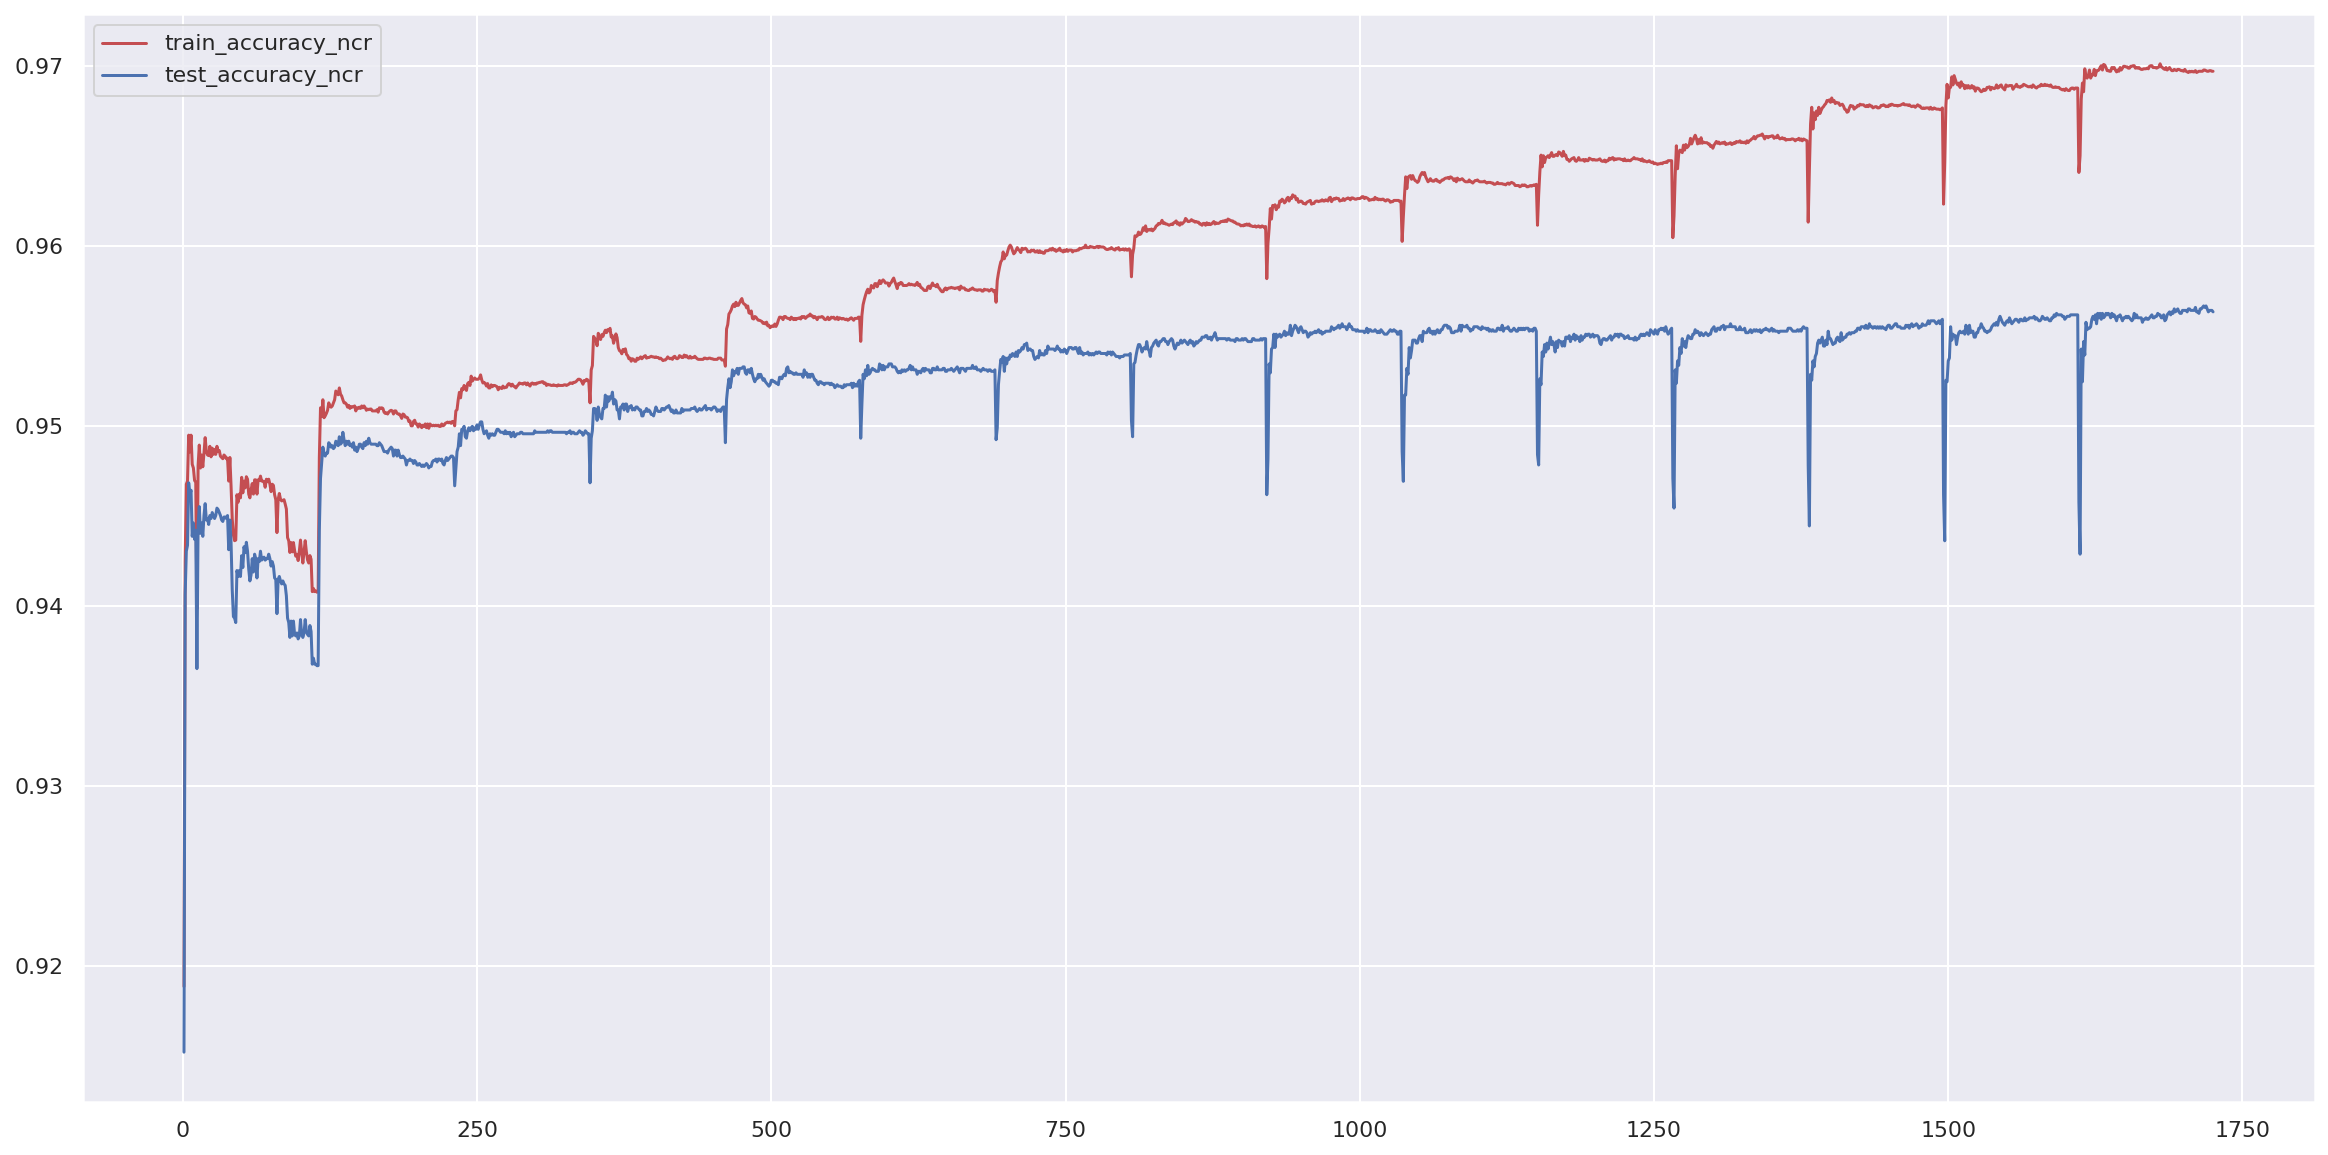

In [182]:
plt.figure(figsize = (20, 10))
x = np.linspace(1, 1725, 1725)

plt.plot(x, train_accuracy1, "r", label = "train_accuracy_ncr")
plt.plot(x, test_accuracy1, "b", label = "test_accuracy_ncr")

plt.legend()
plt.show()

In [156]:
# depth 9 이후 테스트 데이터의 정확도가 점차 낮아지면서 트레인 데이터의 정확도와 점점 차이가 벌어짐.

max(train_accuracy1[1035:1150])

0.9640689655172414

In [163]:
train_accuracy1[1052], test_accuracy1[1052]

(0.9640689655172414, 0.9546767935276149)

In [167]:
model_rf3 = RandomForestClassifier(max_depth=9, n_estimators=18, random_state=0)
model_rf3.fit(X_train_samp_ncr_rf, y_train_samp_ncr)

RandomForestClassifier(max_depth=9, n_estimators=18, random_state=0)

In [175]:
print(classification_report(y_train_samp_ncr, model_rf3.predict(X_train_samp_ncr_rf)))
print(classification_report(y_test_samp_ncr, model_rf3.predict(X_test_samp_ncr_rf)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24649
           1       0.99      0.76      0.86      4351

    accuracy                           0.96     29000
   macro avg       0.97      0.88      0.92     29000
weighted avg       0.96      0.96      0.96     29000

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10214
           1       0.98      0.73      0.84      1899

    accuracy                           0.96     12113
   macro avg       0.97      0.86      0.90     12113
weighted avg       0.96      0.96      0.95     12113



#### 7.3.2 SMOTE+ENN 방법으로 샘플링

In [181]:
train_accuracy2 = []
test_accuracy2 = []

for depth in tqdm(range(1, 16)):
    for estimator in tqdm(range(1, 116)):
        model_rf4 = RandomForestClassifier(max_depth=depth, n_estimators=estimator, random_state=0)
        model_rf4.fit(X_train_samp_smen_rf, y_train_samp_smen)
        train_accuracy2.append(accuracy_score(y_train_samp_smen, model_rf4.predict(X_train_samp_smen_rf)))
        test_accuracy2.append(accuracy_score(y_test_samp_smen, model_rf4.predict(X_test_samp_smen_rf)))


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  2%|▏         | 2/115 [00:00<00:10, 11.08it/s]

  3%|▎         | 3/115 [00:00<00:14,  7.53it/s]

  3%|▎         | 4/115 [00:00<00:17,  6.50it/s]

  4%|▍         | 5/115 [00:00<00:20,  5.44it/s]

  5%|▌         | 6/115 [00:01<00:23,  4.73it/s]

  6%|▌         | 7/115 [00:01<00:27,  3.95it/s]

  7%|▋         | 8/115 [00:01<00:31,  3.38it/s]

  8%|▊         | 9/115 [00:02<00:35,  2.99it/s]

  9%|▊         | 10/115 [00:02<00:39,  2.65it/s]

 10%|▉         | 11/115 [00:03<00:41,  2.53it/s]

 10%|█         | 12/115 [00:03<00:41,  2.47it/s]

 11%|█▏        | 13/115 [00:04<00:43,  2.35it/s]

 12%|█▏        | 14/115 [00:04<00:45,  2.22it/s]

 13%|█▎        | 15/115 [00:05<00:47,  2.11it/s]

 14%|█▍        | 16/115 [00:05<00:56,  1.76it/s]

 15%|█▍        | 17/115 [00:06<01:04,  1.51it/s]

 16%|█▌        | 18/115 [00:07<01:08,  1.43it/s]

 17%|█▋        | 19/115 [00:08<01:08,  1.40it/s]

 17%|█▋        | 20/115 [0

 51%|█████▏    | 59/115 [01:45<03:05,  3.31s/it]

 52%|█████▏    | 60/115 [01:49<03:04,  3.35s/it]

 53%|█████▎    | 61/115 [01:52<03:03,  3.40s/it]

 54%|█████▍    | 62/115 [01:56<03:03,  3.46s/it]

 55%|█████▍    | 63/115 [01:59<03:02,  3.50s/it]

 56%|█████▌    | 64/115 [02:03<03:01,  3.56s/it]

 57%|█████▋    | 65/115 [02:07<03:00,  3.61s/it]

 57%|█████▋    | 66/115 [02:11<02:59,  3.67s/it]

 58%|█████▊    | 67/115 [02:14<02:58,  3.72s/it]

 59%|█████▉    | 68/115 [02:18<02:57,  3.77s/it]

 60%|██████    | 69/115 [02:22<02:55,  3.83s/it]

 61%|██████    | 70/115 [02:26<02:54,  3.88s/it]

 62%|██████▏   | 71/115 [02:30<02:53,  3.95s/it]

 63%|██████▎   | 72/115 [02:34<02:52,  4.01s/it]

 63%|██████▎   | 73/115 [02:39<02:51,  4.07s/it]

 64%|██████▍   | 74/115 [02:43<02:49,  4.13s/it]

 65%|██████▌   | 75/115 [02:47<02:48,  4.20s/it]

 66%|██████▌   | 76/115 [02:52<02:48,  4.31s/it]

 67%|██████▋   | 77/115 [02:56<02:46,  4.38s/it]

 68%|██████▊   | 78/115 [03:01<02:43,  4.42s/it]



  0%|          | 0/115 [00:00<?, ?it/s]

  1%|          | 1/115 [00:00<00:15,  7.44it/s]

  2%|▏         | 2/115 [00:00<00:18,  6.21it/s]

  3%|▎         | 3/115 [00:00<00:23,  4.76it/s]

  3%|▎         | 4/115 [00:01<00:30,  3.59it/s]

  4%|▍         | 5/115 [00:01<00:39,  2.80it/s]

  5%|▌         | 6/115 [00:02<00:51,  2.11it/s]

  6%|▌         | 7/115 [00:03<01:04,  1.68it/s]

  7%|▋         | 8/115 [00:04<01:11,  1.49it/s]

  8%|▊         | 9/115 [00:05<01:19,  1.33it/s]

  9%|▊         | 10/115 [00:06<01:33,  1.12it/s]

 10%|▉         | 11/115 [00:07<01:51,  1.07s/it]

 10%|█         | 12/115 [00:09<01:58,  1.15s/it]

 11%|█▏        | 13/115 [00:10<02:05,  1.23s/it]

 12%|█▏        | 14/115 [00:12<02:20,  1.39s/it]

 13%|█▎        | 15/115 [00:14<02:29,  1.49s/it]

 14%|█▍        | 16/115 [00:15<02:32,  1.54s/it]

 15%|█▍        | 17/115 [00:17<02:40,  1.64s/it]

 16%|█▌        | 18/115 [00:19<02:52,  1.78s/it]

 17%|█▋        | 19/115 [00:21<02:57,  1.85s/it]

 17%|█▋        | 2

 50%|█████     | 58/115 [03:47<06:51,  7.21s/it]

 51%|█████▏    | 59/115 [03:55<06:50,  7.33s/it]

 52%|█████▏    | 60/115 [04:02<06:49,  7.44s/it]

 53%|█████▎    | 61/115 [04:10<06:47,  7.55s/it]

 54%|█████▍    | 62/115 [04:18<06:46,  7.68s/it]

 55%|█████▍    | 63/115 [04:26<06:45,  7.81s/it]

 56%|█████▌    | 64/115 [04:35<06:44,  7.93s/it]

 57%|█████▋    | 65/115 [04:43<06:43,  8.06s/it]

 57%|█████▋    | 66/115 [04:52<06:47,  8.31s/it]

 58%|█████▊    | 67/115 [05:00<06:43,  8.40s/it]

 59%|█████▉    | 68/115 [05:09<06:39,  8.50s/it]

 60%|██████    | 69/115 [05:18<06:36,  8.61s/it]

 61%|██████    | 70/115 [05:27<06:33,  8.73s/it]

 62%|██████▏   | 71/115 [05:36<06:29,  8.84s/it]

 63%|██████▎   | 72/115 [05:45<06:25,  8.97s/it]

 63%|██████▎   | 73/115 [05:55<06:22,  9.10s/it]

 64%|██████▍   | 74/115 [06:04<06:18,  9.22s/it]

 65%|██████▌   | 75/115 [06:14<06:19,  9.48s/it]

 66%|██████▌   | 76/115 [06:26<06:36, 10.17s/it]

 67%|██████▋   | 77/115 [06:38<06:41, 10.56s/it]



 67%|██████▋   | 10/15 [1:50:08<1:14:23, 892.64s/it]

  0%|          | 0/115 [00:00<?, ?it/s]

  1%|          | 1/115 [00:00<00:26,  4.32it/s]

  2%|▏         | 2/115 [00:00<00:32,  3.43it/s]

  3%|▎         | 3/115 [00:01<00:44,  2.54it/s]

  3%|▎         | 4/115 [00:02<00:58,  1.91it/s]

  4%|▍         | 5/115 [00:02<01:09,  1.59it/s]

  5%|▌         | 6/115 [00:04<01:22,  1.32it/s]

  6%|▌         | 7/115 [00:05<01:42,  1.05it/s]

  7%|▋         | 8/115 [00:06<01:55,  1.08s/it]

  8%|▊         | 9/115 [00:08<02:11,  1.24s/it]

  9%|▊         | 10/115 [00:10<02:31,  1.44s/it]

 10%|▉         | 11/115 [00:12<02:43,  1.57s/it]

 10%|█         | 12/115 [00:14<03:07,  1.82s/it]

 11%|█▏        | 13/115 [00:17<03:23,  2.00s/it]

 12%|█▏        | 14/115 [00:19<03:40,  2.18s/it]

 13%|█▎        | 15/115 [00:22<03:56,  2.36s/it]

 14%|█▍        | 16/115 [00:25<04:08,  2.51s/it]

 15%|█▍        | 17/115 [00:28<04:20,  2.66s/it]

 16%|█▌        | 18/115 [00:31<04:37,  2.86s/it]

 17%|█▋       

 50%|████▉     | 57/115 [05:31<10:28, 10.84s/it]

 50%|█████     | 58/115 [05:42<10:29, 11.04s/it]

 51%|█████▏    | 59/115 [05:54<10:23, 11.14s/it]

 52%|█████▏    | 60/115 [06:06<10:25, 11.38s/it]

 53%|█████▎    | 61/115 [06:18<10:28, 11.65s/it]

 54%|█████▍    | 62/115 [06:30<10:29, 11.88s/it]

 55%|█████▍    | 63/115 [06:43<10:26, 12.05s/it]

 56%|█████▌    | 64/115 [06:55<10:24, 12.24s/it]

 57%|█████▋    | 65/115 [07:08<10:15, 12.31s/it]

 57%|█████▋    | 66/115 [07:21<10:15, 12.56s/it]

 58%|█████▊    | 67/115 [07:34<10:09, 12.70s/it]

 59%|█████▉    | 68/115 [07:47<10:01, 12.81s/it]

 60%|██████    | 69/115 [08:01<10:02, 13.10s/it]

 61%|██████    | 70/115 [08:15<10:02, 13.38s/it]

 62%|██████▏   | 71/115 [08:29<10:00, 13.66s/it]

 63%|██████▎   | 72/115 [08:44<09:59, 13.94s/it]

 63%|██████▎   | 73/115 [08:58<09:55, 14.17s/it]

 64%|██████▍   | 74/115 [09:13<09:49, 14.39s/it]

 65%|██████▌   | 75/115 [09:28<09:37, 14.44s/it]

 66%|██████▌   | 76/115 [09:43<09:30, 14.63s/it]



100%|██████████| 115/115 [23:12<00:00, 12.11s/it]

100%|██████████| 15/15 [3:39:04<00:00, 876.33s/it] 


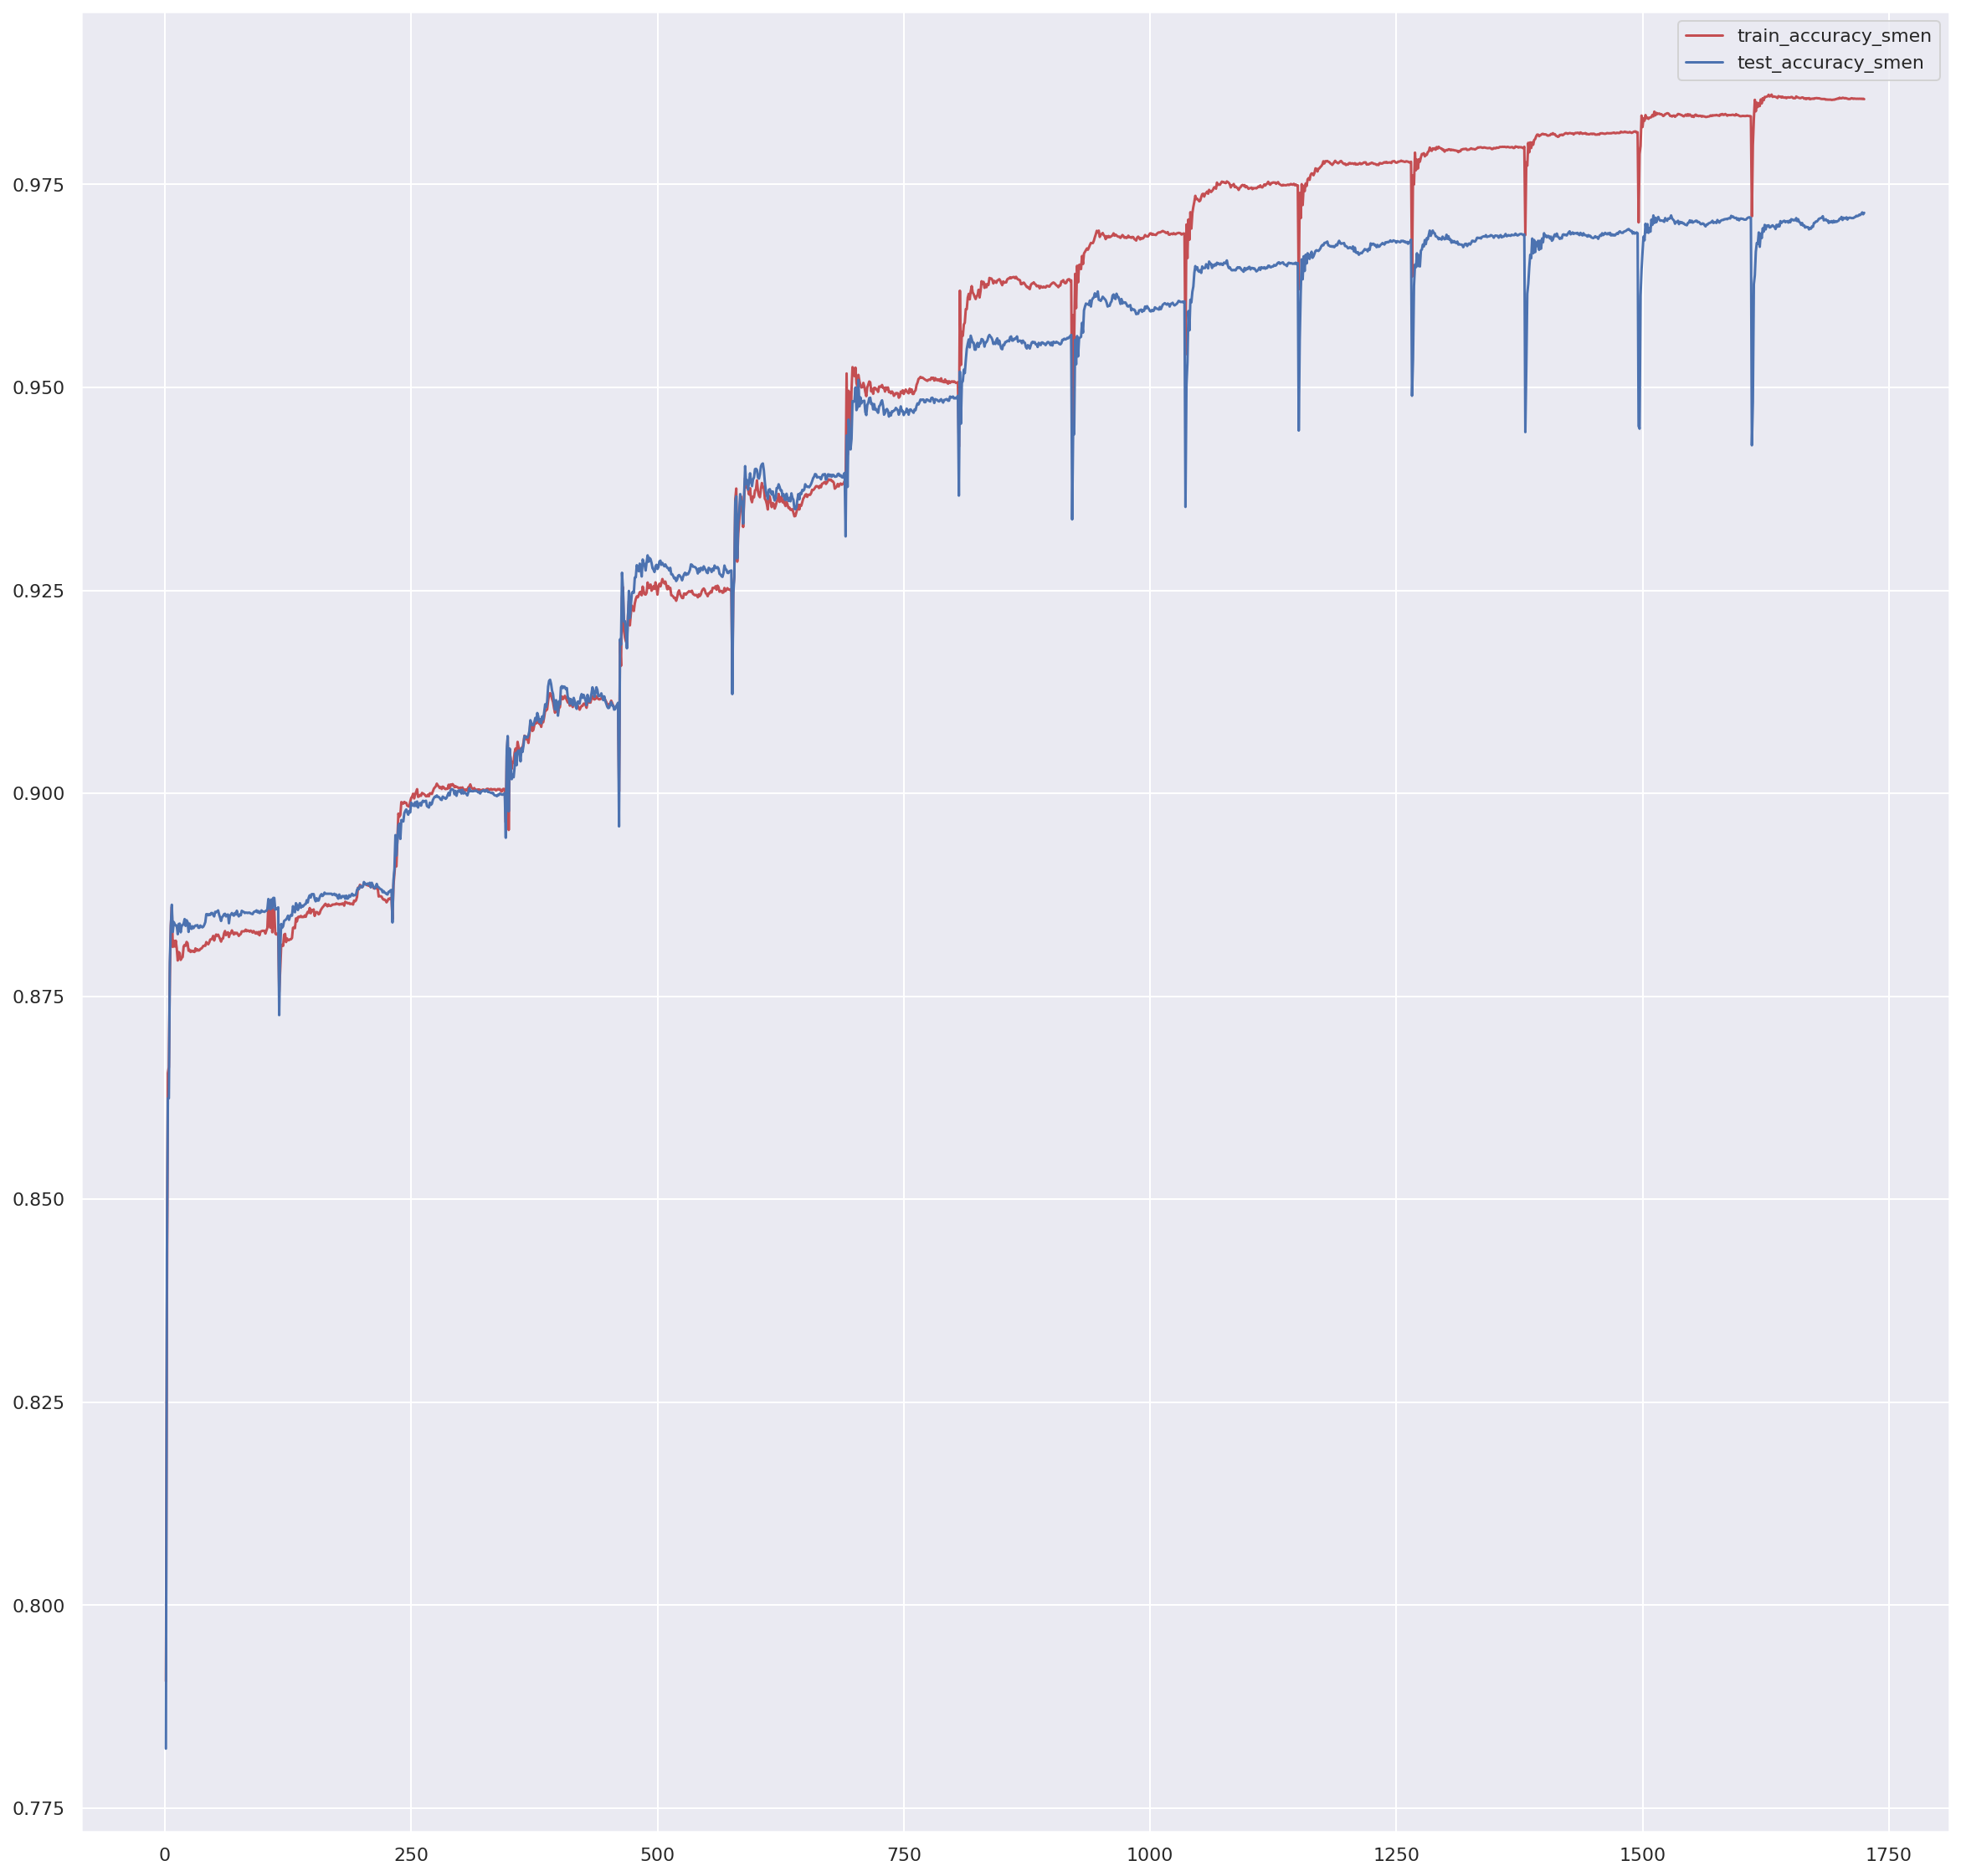

In [184]:
plt.figure(figsize = (20, 20))
x = np.linspace(1, 1725, 1725)

plt.plot(x, train_accuracy2, "r", label = "train_accuracy_smen")
plt.plot(x, test_accuracy2, "b", label = "test_accuracy_smen")

plt.legend()
plt.show()

In [ ]:
# depth 12 이후 테스트 데이터의 정확도가 점차 낮아지면서 트레인 데이터의 정확도와 점점 차이가 벌어짐.

In [187]:
max(train_accuracy2[1380:1495])

0.981515998757378

In [192]:
print(train_accuracy2.index(0.981515998757378))

1491


In [194]:
train_accuracy2[1491], test_accuracy2[1491]

(0.981515998757378, 0.9689391822669274)

In [195]:
model_rf4 = RandomForestClassifier(max_depth=12, n_estimators=112, random_state=0)
model_rf4.fit(X_train_samp_smen_rf, y_train_samp_smen)

RandomForestClassifier(max_depth=12, n_estimators=112, random_state=0)

In [196]:
print(classification_report(y_train_samp_smen, model_rf4.predict(X_train_samp_smen_rf)))
print(classification_report(y_test_samp_smen, model_rf4.predict(X_test_samp_smen_rf)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23780
           1       1.00      0.96      0.98     27724

    accuracy                           0.98     51504
   macro avg       0.98      0.98      0.98     51504
weighted avg       0.98      0.98      0.98     51504

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9838
           1       0.99      0.95      0.97     11636

    accuracy                           0.97     21474
   macro avg       0.97      0.97      0.97     21474
weighted avg       0.97      0.97      0.97     21474



#### 샘플링 방법의 한계

관련 논문 : <On sampling algorithms for imbalanced binary data: performance comparison and some caveats(2017.09 / HanYong Kim, Woojoo Lee)>

- 오버샘플링의 경우 Figure 2.1과 같이 클래스 1인 데이터를 복제함으로써 불균형 문제를 해결하는 것이다(Longadge와 Dongre, 2013). 오버샘플링은 원래 데이 터의 수가 많을 때에서는 데이터의 수가 더 늘어나게 되어 모형구축에 시간이 더 걸린다는 단점이 있고, 과적합(overfitting)의 문제가 있을 수 있다는 지적을 받았다(He와 Garcia, 2009).

- 언더샘플링의 경우 반응변수가 0인 클래스를 랜덤하게 제거하여 데이터의 불균형 문제를 해결하는 것이다(Longadge와 Dongre, 2013). 언더샘플링은 이처럼 데이터를 없애는 방법이기 때문에 정보손실이라는 문제가 생길 수 있다.

- SMOTE는 오버샘플링과 언더샘플링을 합성한 방법이다. 주목할만한 점은 앞서 설명하였던 오버샘플링과는 다르게 Figure 2.3과 같이 기존의 데이터와 같은 위치가 아닌 약간 이동된 클래스 1인 점들을 추가하는 방식으로 동작한다. 이를 통해 SMOTE는 기존 의 오버샘플링의 오버피팅의 문제를 일부 개선해준다고 알려져 있다(Chawla 등, 2002).

## 8. Anomaly detection

- 비지도학습 알고리즘
- 정상 데이터만 가지고 학습.

### 8.1 One-Class SVM

- A One-Class Support Vector Machine is an unsupervised learning algorithm that is trained only on the ‘normal’ data, in our case the negative examples.
- It learns the boundaries of these points and is therefore able to classify any points that lie outside the boundary as, you guessed it, outliers.

In [89]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

In [90]:
# train, test 데이터셋 구분
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)

In [91]:
# Human = 0, Bot = 1
train_normal = train[train["Type"] == 0] 
train_outlier = train[train["Type"] == 1]

# test_normal = test[test["Type"] == 0]
# test_outlier = test[test["Type"] == 1]

In [216]:
outlier_prop = len(train_outlier) / len(train_normal)

svm = OneClassSVM(kernel="rbf", nu=1e-5, gamma=1e-10)

# 1. Nu is the parameter that controls the training errors (and the number of SVs). This parameter is always within the range (0,1].
# 2. Gamma parameter determines the influence of radius on the kernel. The range of this parameter depends on your data and application.
# https://bskyvision.com/163

# svm1 = OneClassSVM(kernel="rbf", nu=outlier_prop, gamma=0.01)
# svm2 = OneClassSVM(kernel="rbf", nu=outlier_prop, gamma=0.001)
# svm3 = OneClassSVM(kernel="rbf", nu=outlier_prop, gamma=0.0001)
# svm4 = OneClassSVM(kernel="rbf", nu=outlier_prop, gamma=0.00001)
# svm5 = OneClassSVM(kernel="rbf", nu=outlier_prop, gamma=0.000001)

In [189]:
%%time
svm.fit(train_normal.iloc[:, :-1])

CPU times: user 1.65 s, sys: 93.3 ms, total: 1.75 s
Wall time: 1.82 s


OneClassSVM(gamma=1e-10, nu=1e-05)

In [190]:
%%time
pred_train = svm.predict(train.iloc[:, :-1])
pred_test = svm.predict(test.iloc[:, :-1])

# 정상으로 예측하면 1, 비정상으로 예측하면 -1
# scores = svm.score_samples(x)

CPU times: user 2.19 s, sys: 69.4 ms, total: 2.25 s
Wall time: 2.4 s


In [191]:
pred_train = list(pred_train)
pred_test = list(pred_test)

pred_train = [
    0 if data == 1 else 1
    for data in pred_train
]

pred_test =[
    0 if data == 1 else 1
    for data in pred_test
]

# pred_train = pred_train.apply(lambda x: x.replace(1, 0))
# pred_train = pred_train.apply(lambda x: x.replace(-1, 1))
# pred_train = df['Type'].astype(int)

In [192]:
accuracy_score(test["Type"], pred_test)

0.25965018094089265

In [162]:
outlier_prop

0.1439126060083369

In [194]:
nu_params = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
gamma_params = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]

pred_train_accuracy = []
pred_test_accuracy = []

for nu in tqdm(nu_params):
    for gamma in tqdm(gamma_params):
        svm = OneClassSVM(kernel="rbf", nu=nu, gamma=gamma)
        svm.fit(train_normal.iloc[:, :-1])
        
        pred_train = list(svm.predict(train.iloc[:, :-1]))
        pred_test = list(svm.predict(test.iloc[:, :-1]))
        
        pred_train = [
            0 if data == 1 else 1
            for data in pred_train
        ]
        pred_test =[
            0 if data == 1 else 1
            for data in pred_test
        ]
        
        pred_train_accuracy.append(accuracy_score(train["Type"], pred_train))
        pred_test_accuracy.append(accuracy_score(test["Type"], pred_test))



  0%|          | 0/10 [00:00<?, ?it/s]


  0%|          | 0/15 [00:00<?, ?it/s]


  7%|▋         | 1/15 [17:42<4:07:51, 1062.25s/it]


 13%|█▎        | 2/15 [36:26<3:54:12, 1080.97s/it]


 20%|██        | 3/15 [53:55<3:34:15, 1071.25s/it]


 27%|██▋       | 4/15 [1:11:32<3:15:38, 1067.09s/it]


 33%|███▎      | 5/15 [1:28:24<2:55:05, 1050.56s/it]


 40%|████      | 6/15 [1:40:31<2:22:59, 953.26s/it] 


 47%|████▋     | 7/15 [1:51:18<1:54:52, 861.53s/it]


 53%|█████▎    | 8/15 [1:56:55<1:22:08, 704.14s/it]


 60%|██████    | 9/15 [1:58:24<51:57, 519.50s/it]  


 67%|██████▋   | 10/15 [1:59:50<32:27, 389.59s/it]


 73%|███████▎  | 11/15 [2:01:15<19:53, 298.32s/it]


 80%|████████  | 12/15 [2:02:43<11:45, 235.23s/it]


 87%|████████▋ | 13/15 [2:04:09<06:20, 190.17s/it]


 93%|█████████▎| 14/15 [2:05:35<02:39, 159.02s/it]


100%|██████████| 15/15 [2:07:01<00:00, 508.11s/it]


 10%|█         | 1/10 [2:07:01<19:03:15, 7621.67s/it]


  0%|          | 0/15 [00:00<?, ?it/s]


  7%|▋         

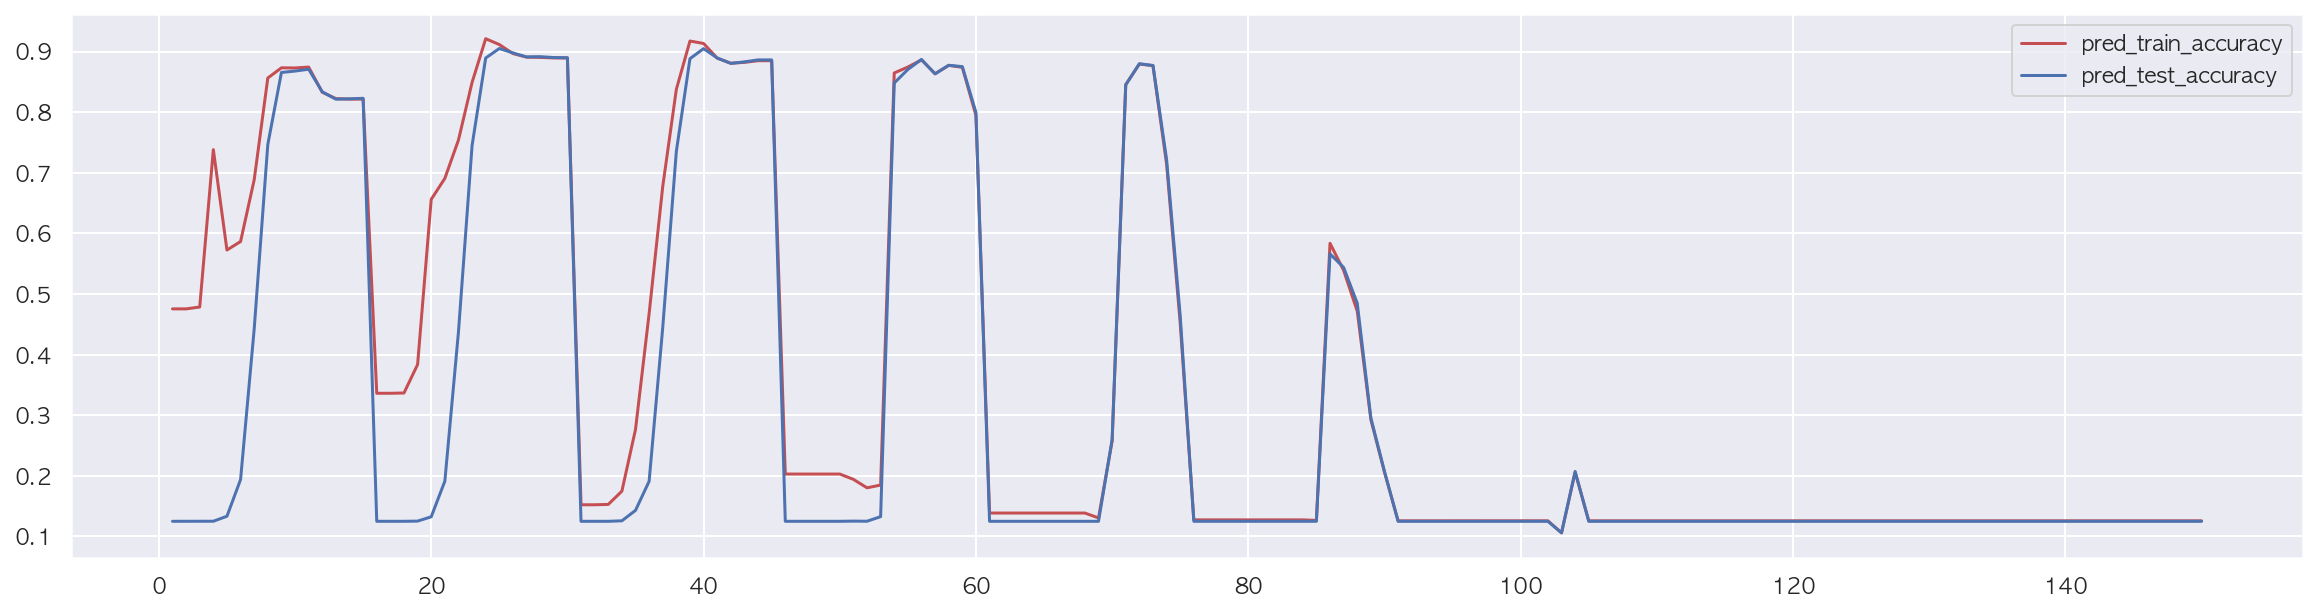

In [196]:
plt.figure(figsize = (20, 5))
x = np.linspace(1, 150, 150)

plt.plot(x, pred_train_accuracy, "r", label = "pred_train_accuracy")
plt.plot(x, pred_test_accuracy, "b", label = "pred_test_accuracy")

plt.legend()
plt.show()

In [210]:
list(zip(pred_train_accuracy[15:30], pred_test_accuracy[15:30]))

[(0.3362569425246915, 0.12505026135906716),
 (0.3362569425246915, 0.12505026135906716),
 (0.3367093061245005, 0.12505026135906716),
 (0.3837551205046367, 0.12535182951347004),
 (0.6561282702118569, 0.13248894250100524),
 (0.6907592169083461, 0.19119420989143546),
 (0.7540398582594053, 0.43737434660233215),
 (0.8491618707747983, 0.744973864093285),
 (0.9211882083888316, 0.8893244873341375),
 (0.9115629162373401, 0.9050060313630881),
 (0.896634917443643, 0.8977683956574186),
 (0.8908295845794275, 0.8911338962605548),
 (0.8903772209796185, 0.8915359871330921),
 (0.8894724937800005, 0.890128669079212),
 (0.889346837224498, 0.889827100924809)]

In [201]:
# nu=1e-2, gamma=1e-10가 최적의 파라미터

In [211]:
%%time
svm = OneClassSVM(kernel="rbf", nu=1e-2, gamma=1e-10)
svm.fit(train_normal.iloc[:, :-1])

pred_train = list(svm.predict(train.iloc[:, :-1]))
pred_test = list(svm.predict(test.iloc[:, :-1]))

pred_train = [
    0 if data == 1 else 1
    for data in pred_train
]
pred_test =[
    0 if data == 1 else 1
    for data in pred_test
    ]

CPU times: user 10.6 s, sys: 372 ms, total: 11 s
Wall time: 11.6 s


In [214]:
print(classification_report(train["Type"], pred_train))
print(classification_report(test["Type"], pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     34785
           1       0.83      0.37      0.52      5006

    accuracy                           0.91     39791
   macro avg       0.87      0.68      0.73     39791
weighted avg       0.91      0.91      0.90     39791

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8704
           1       0.74      0.37      0.49      1244

    accuracy                           0.91      9948
   macro avg       0.83      0.68      0.72      9948
weighted avg       0.89      0.91      0.89      9948



In [ ]:
# 비슷하게 좋은 결과 값을 보여줬던 nu=1e-2, gamma=1e-9의 경우

In [212]:
%%time
svm2 = OneClassSVM(kernel="rbf", nu=1e-2, gamma=1e-9)
svm2.fit(train_normal.iloc[:, :-1])

pred_train2 = list(svm2.predict(train.iloc[:, :-1]))
pred_test2 = list(svm2.predict(test.iloc[:, :-1]))

pred_train2 = [
    0 if data == 1 else 1
    for data in pred_train2
]
pred_test2 =[
    0 if data == 1 else 1
    for data in pred_test2
    ]

CPU times: user 59 s, sys: 898 ms, total: 59.9 s
Wall time: 1min 1s


In [215]:
print(classification_report(train["Type"], pred_train2))
print(classification_report(test["Type"], pred_test2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     34785
           1       0.72      0.61      0.66      5006

    accuracy                           0.92     39791
   macro avg       0.83      0.79      0.81     39791
weighted avg       0.92      0.92      0.92     39791

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8704
           1       0.55      0.60      0.58      1244

    accuracy                           0.89      9948
   macro avg       0.75      0.77      0.76      9948
weighted avg       0.89      0.89      0.89      9948



In [139]:
# # Extremely Randomized Trees 통한 변수 선택
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import ExtraTreesClassifier

# n_sample = 10000
# idx = np.random.choice(range(len(y_train2)), n_sample)
# model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train2[idx, :], y_train2[idx])
# selector = SelectFromModel(model_sel, prefit=True, max_features=115)
# X_train_rf2 = selector.transform(X_train2)
# X_test_rf2 = selector.transform(X_test2)

### 8.2 딥러닝(Auto Encoder)